<div align="center"><h1><font color='darkblue'>Evaluation Project-6</div>

<div align="center"><h2><font color='Red'><u>Loan Application Status Prediction Project</div>

<h2><font color='red'><u>Abstract Summary</u></font></h2><br><h5><font color='grey'>1. Given the data set, we were to make a Binary prediction of loan approval based on the features given.
<br><br>2. During Data analysis it was found that the dataset was imbalanced and there were null and outliers.if we had to take out all of this, and treat the imbalance, there wouldnt be much of a data to work on.
<br><br>3. Hence we individually looked at each column, and worked towards bringing doen the imbalance by removing the appropriate outliers and null values corresponding to the lower class in the label.
<br><br>4. Despite this there was still imbalance, but it had been reduced drastically. we then used feature selection keeping the same issue in hand and experimented on features with similar entropy. untill we could minimise the imbalance further.</font>
    <font color='red'><br><br>KINDLY NOTE: The inspiration to look at the EDA steps untill here was found online. Credit to the author.</font>
<font color='grey'><br><br>5. Next, we started modelling, we looked at the approach in different ways, we tried Logistic regression, then Random forest classifier, then got better success with decision tree classifier. <br>This we coupled with PCA decomposition method, and got the best outcome at a maxdepth of 9. The Decision tree Branch is show below
<br><br>6.THen we looked at the metrics. a copy of the Classification report is shown below.
    <br>the final scores are precision and recall of 0.73 or 73%

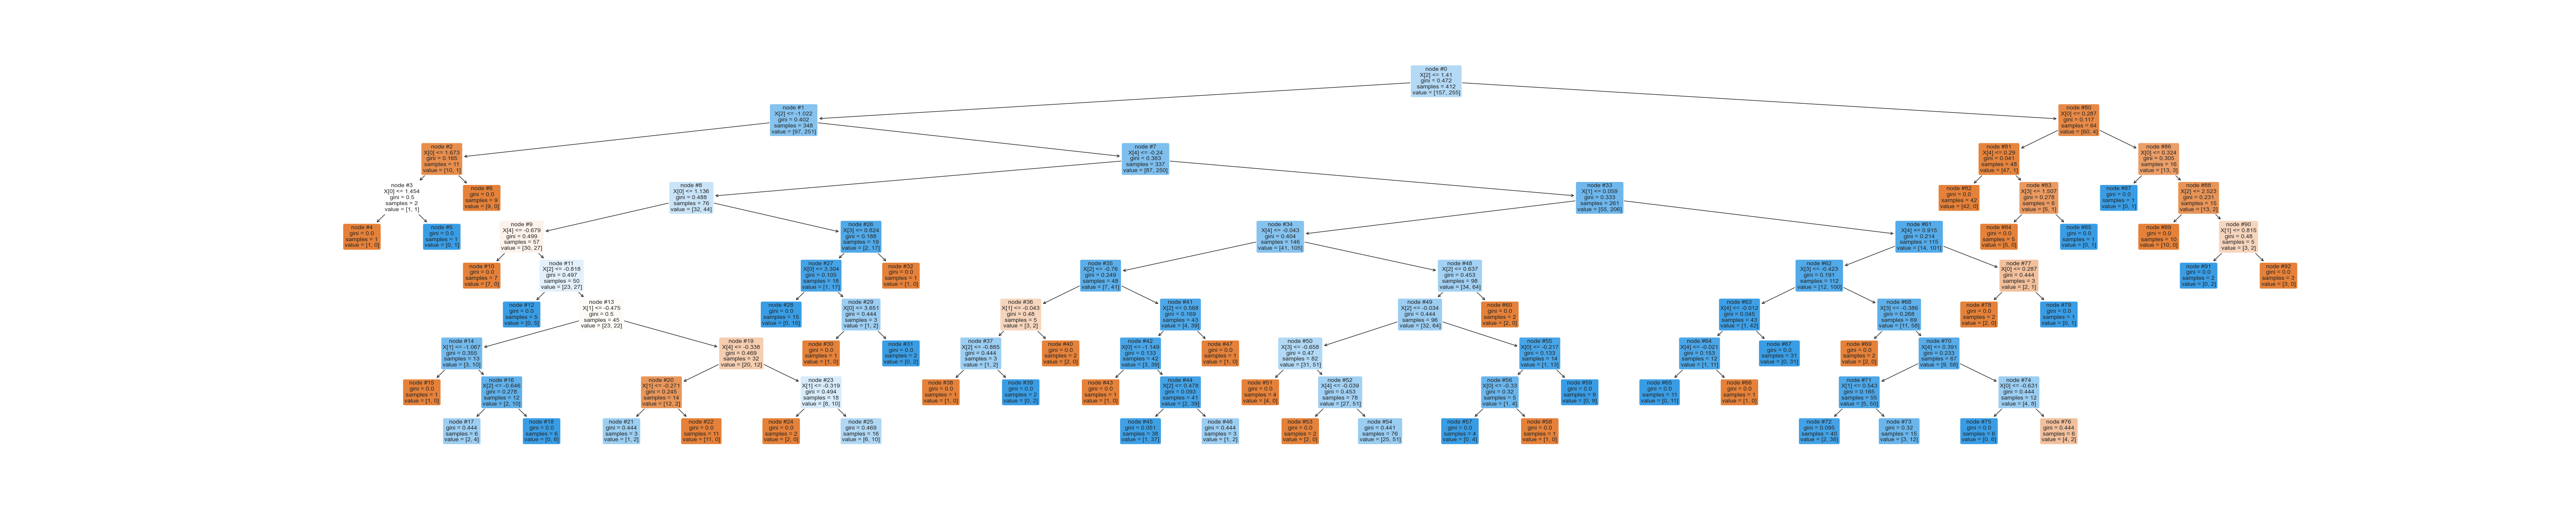

In [222]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

           N       0.65      0.63      0.64        35
           Y       0.81      0.83      0.82        69

    accuracy                           0.76       104
   macro avg       0.73      0.73      0.73       104
weighted avg       0.76      0.76      0.76       104



<h3><font color='maroon'>Import libraries

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load Dataset
loan_train = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv',header=0)
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
#Let's know how many factors of an individual and Number of Samples
print("The Loan Prediction Dataset has")
print("\t\tNumber of Factors : \t", loan_train.shape[1] - 1)
print("\t\tNumber of Samples : \t", loan_train.shape[0])

The Loan Prediction Dataset has
		Number of Factors : 	 12
		Number of Samples : 	 614


# Exploratory Data Analysis

#### Let's do some descriptive statistics

In [8]:
#Descriptive Statistics on Loan Data
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Let's check the dataset is Balanced or Imbalanced

In [10]:
# Let's check is there any null values on Loan_Status
loan_train['Loan_Status'].isnull().sum()

0

In [11]:
# TODO : To get unique values and value_counts on Loan_Status
print("Unique values : ", loan_train['Loan_Status'].unique())
print("Unique values counts : \n", loan_train['Loan_Status'].value_counts())

Unique values :  ['Y' 'N']
Unique values counts : 
 Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

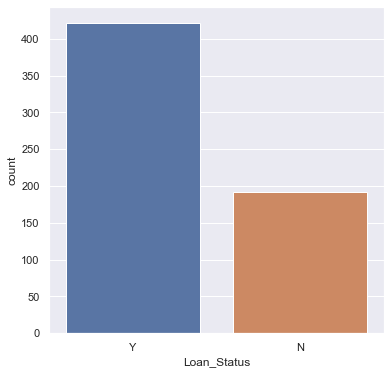

In [12]:
# Let's plot the Unique value counts
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Loan_Status', data = loan_train)
# plt.savefig('../images/loan_status_counts.png')

- It is clearly an Imbalanced Dataset. 
- Two-third of Loan_Status is having `Yes` value.
- One-third of Loan_Status is having `No` value.

#### To handle the Imbalance towards the label remove the samples havin null values in any of the columns and Loan_Status must be Yes

In [13]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
columns_having_null_values = ['Gender', 'Married', 'Dependents', 'Self_Employed',
                               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for column in columns_having_null_values:
    samples_index_to_be_dropped = loan_train[loan_train[column].isnull()]
    samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
    loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
    loan_train.reset_index(drop = True, inplace = True)
    
columns_having_outliers = {'ApplicantIncome':25000, 'CoapplicantIncome':15000, 'LoanAmount':400}
for column in columns_having_outliers:
    samples_index_to_be_dropped = loan_train[loan_train[column] > columns_having_outliers[column]]
    samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
    loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
    loan_train.reset_index(drop = True, inplace = True)

In [15]:
loan_train.shape

(516, 13)

## Feature Engineering


#### 1. Loan_ID

In [16]:
# 1. Loan ID
loan_train['Loan_ID'].describe()

count          516
unique         516
top       LP001003
freq             1
Name: Loan_ID, dtype: object

Removind 'Loan_ID'  as it is a nominal data column

<br><br><br>

#### 2. Gender

In [17]:
# TODO : Describe Gender column
loan_train['Gender'].describe()

count      511
unique       2
top       Male
freq       422
Name: Gender, dtype: object

In [18]:
print("Number of null values : ", loan_train['Gender'].isnull().sum())
print("Unique values : ", loan_train['Gender'].unique())
print("Value counts : \n", loan_train['Gender'].value_counts())

Number of null values :  5
Unique values :  ['Male' 'Female' nan]
Value counts : 
 Male      422
Female     89
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

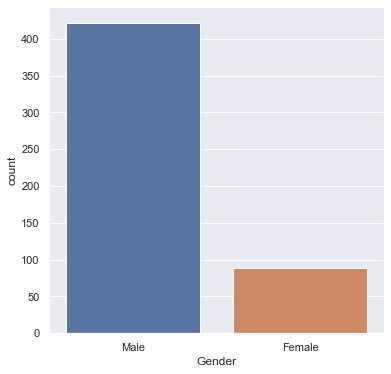

In [19]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Gender', data = loan_train)
# plt.savefig('../images/gender_counts_0.png')

In [20]:
#Print the samples having null values in gender column
samples_with_null_values_on_gender_column = loan_train[loan_train['Gender'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
266,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
397,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
423,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
483,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [23]:
samples_index_to_be_dropped = loan_train[loan_train['Gender'].isnull()]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
loan_train.reset_index(drop = True, inplace = True)

- Most of these people are married. So we can't fill Gender based on `Married` column.
- Most of these people are graduated. So we can't fill Gender based on `Education` column.
- Most of these people are self employed. So we can't fill Gender based on `Self_Employed` column.
- Most of these people are having `Credit_History` and `Loan_Amount_Term` as 360 days(1 year).
- Since we are going to predict applicant's Gender, we can omit CoapplicantIncome
- So we are going predict the Gender based on `Dependents`, `ApplicantIncome`, `LoanAmount`, and `Property_Area`

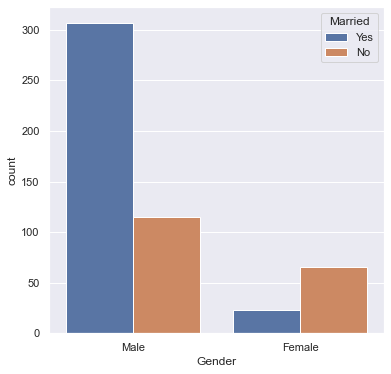

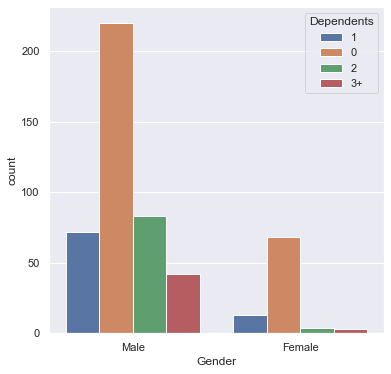

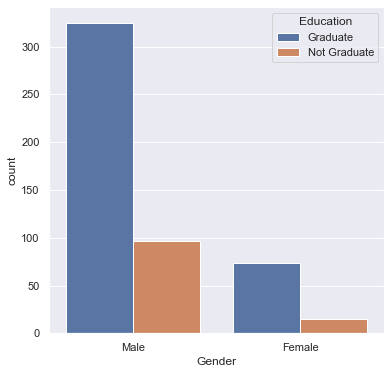

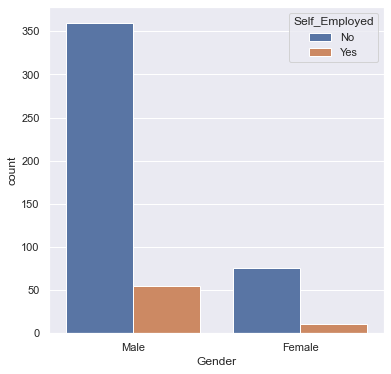

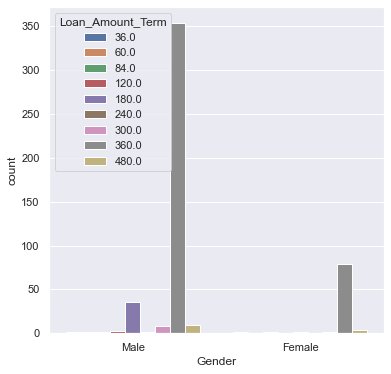

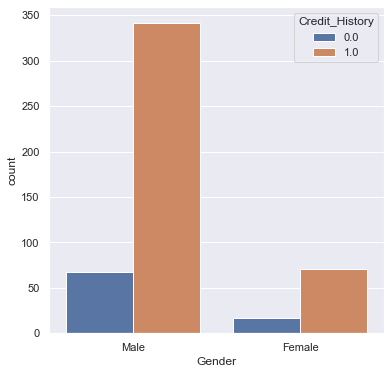

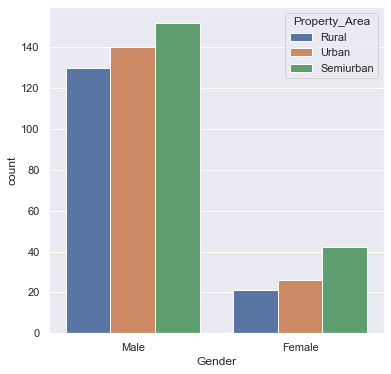

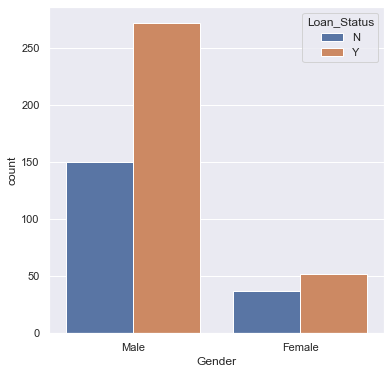

In [24]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Gender', data = loan_train, hue = 'Married')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Gender', data = loan_train, hue = 'Dependents')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Gender', data = loan_train, hue = 'Education')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Gender', data = loan_train, hue = 'Self_Employed')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Gender', data = loan_train, hue = 'Loan_Amount_Term')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Gender', data = loan_train, hue = 'Credit_History')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Gender', data = loan_train, hue = 'Property_Area')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Gender', data = loan_train, hue = 'Loan_Status')
plt.show()

In [25]:
# Initialize Gender predictor columns list
GENDER_PREDICTOR_COLUMNS = ['Dependents', 'ApplicantIncome', 'LoanAmount', 'Property_Area', 'Gender']

# Let's get the rows not having null values on gender column
samples_without_null_values_on_gender_column = loan_train[~loan_train['Gender'].isnull()][GENDER_PREDICTOR_COLUMNS]
print("Number of Samples Before dropping samples having null values in predictor columns for Gender column: ", 
     samples_without_null_values_on_gender_column.shape[0])

# Dropping samples having null values in predictor columns
samples_without_null_values_on_gender_column = samples_without_null_values_on_gender_column.dropna(how = 'any')
print("Number of Samples After dropping samples having null values in predictor columns for Gender column: ", 
     samples_without_null_values_on_gender_column.shape[0])

# Conveting categorical values on Dependents column to numerical values
samples_without_null_values_on_gender_column['Dependents'] = samples_without_null_values_on_gender_column['Dependents'].apply(
    lambda x : {'0': 0, '1':1, '2':2, '3+':3}[x]
)
# Conveting categorical values on Property_Area column to numerical values
samples_without_null_values_on_gender_column['Property_Area'] = samples_without_null_values_on_gender_column['Property_Area'].apply(
    lambda x : {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[x]
)

# Building Gender Predictor using Pipeline and KNeigborsClassifiers
Gender_predictor = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('gen_predictor', KNeighborsClassifier(n_neighbors = 1))
])
Gender_predictor.fit(samples_without_null_values_on_gender_column.iloc[:, :-1].values,
                    samples_without_null_values_on_gender_column.iloc[:, -1].values)

Number of Samples Before dropping samples having null values in predictor columns for Gender column:  511
Number of Samples After dropping samples having null values in predictor columns for Gender column:  494


Pipeline(steps=[('scaler', StandardScaler()),
                ('gen_predictor', KNeighborsClassifier(n_neighbors=1))])

In [26]:
# Function which fills null values on Gender column
def gender_null_value_filler(df, Gender_predictor):
    for row in range(df.shape[0]):
        if df.loc[row, 'Gender'] is np.nan:
            X = loan_train.loc[row, GENDER_PREDICTOR_COLUMNS[:-1]].values.reshape(1, -1)
            X[0][0] = {'0': 0, '1':1, '2':2, '3+':3}[X[0][0]]
            X[0][3] = {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[X[0][3]]
            df.loc[row, 'Gender'] = Gender_predictor.predict(X)
    return df

In [27]:
# TODO : Filling null values on Gender columns optimally
loan_train = gender_null_value_filler(loan_train, Gender_predictor)

In [28]:
# TODO : Encoding Gender Column - Male : 1, Female : 0
loan_train['Gender'] = loan_train.Gender.apply(lambda x : {'Male': 1, 'Female' : 0}[x])

<br><br><br>

#### 3. Married

In [29]:
# TODO : Describing Married column
loan_train['Married'].describe()

count     516
unique      2
top       Yes
freq      334
Name: Married, dtype: object

In [30]:
print("Number of null values : ", loan_train['Married'].isnull().sum())
print("Unique values : ", loan_train['Married'].unique())
print("Value counts : \n", loan_train['Married'].value_counts())

Number of null values :  0
Unique values :  ['Yes' 'No']
Value counts : 
 Yes    334
No     182
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

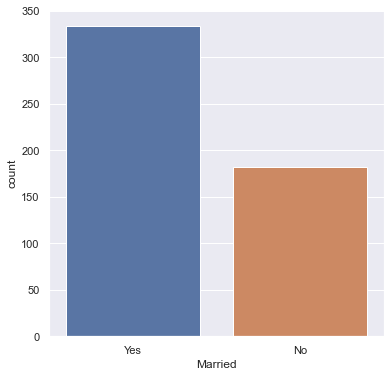

In [31]:
# Let's plot the Unique value counts
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Married', data = loan_train)
# plt.savefig('../images/married_counts_0.png')

#### There are three samples having null values on married column.
#### Let's get the samples having null values.

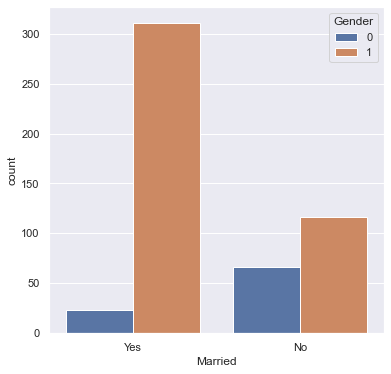

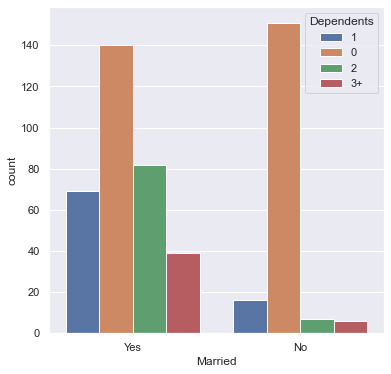

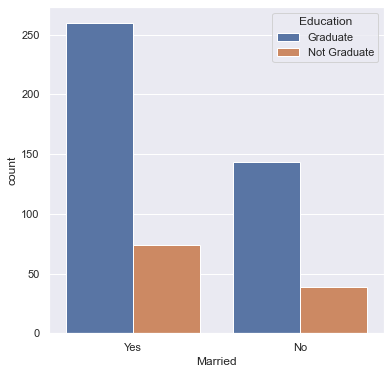

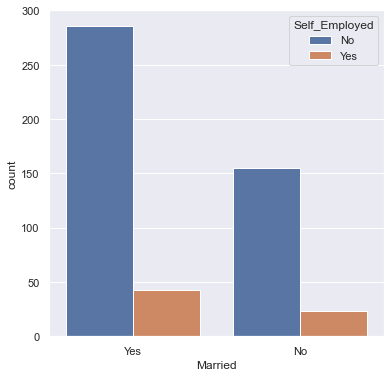

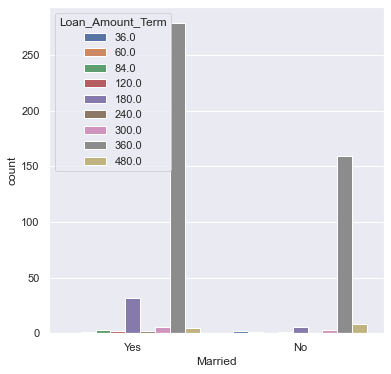

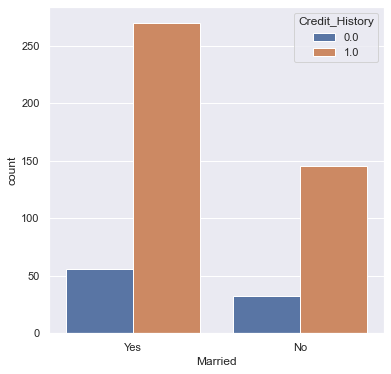

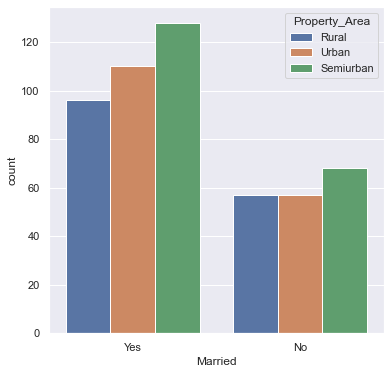

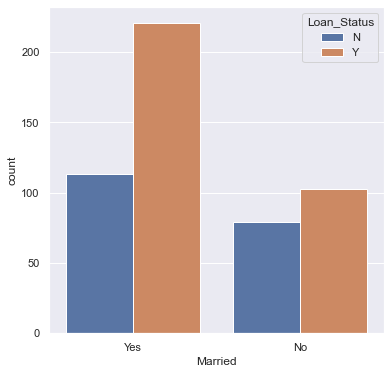

In [32]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Married', data = loan_train, hue = 'Gender')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Married', data = loan_train, hue = 'Dependents')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Married', data = loan_train, hue = 'Education')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Married', data = loan_train, hue = 'Self_Employed')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Married', data = loan_train, hue = 'Loan_Amount_Term')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Married', data = loan_train, hue = 'Credit_History')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Married', data = loan_train, hue = 'Property_Area')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Married', data = loan_train, hue = 'Loan_Status')
plt.show()

In [33]:
#Print the samples having null values in gender column
samples_with_null_values_on_gender_column = loan_train[loan_train['Married'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [34]:
samples_index_to_be_dropped = loan_train[loan_train['Married'].isnull()]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
loan_train.reset_index(drop = True, inplace = True)

In [35]:
loan_train[loan_train['Married'] == 'Yes'].describe(include = 'all').iloc[:, :]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,334,334.000000,334,330,334,329,334.000000,334.000000,327.000000,330.000000,326.000000,334,334
unique,334,NaN,1,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,NaN,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,NaN,334,140,260,286,NaN,NaN,NaN,NaN,NaN,128,221
mean,NaN,0.931138,NaN,NaN,NaN,NaN,5144.110778,1764.332096,149.067278,337.672727,0.828221,NaN,NaN
std,NaN,0.253600,NaN,NaN,NaN,NaN,5514.953584,2055.976088,71.811583,65.891609,0.377768,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,60.000000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,2883.750000,0.000000,108.000000,360.000000,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,3832.000000,1611.000000,132.000000,360.000000,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,5741.000000,2431.250000,175.000000,360.000000,1.000000,NaN,NaN


- There are 398 married applicants, among them 309 are Graduated, 326 are Not Self_Employed, 151 semi-urban.
- From this, we can assume that all missing samples as Married.

In [36]:
# Let's fill null values in Married columns with 'Yes'
loan_train['Married'] = loan_train['Married'].fillna('Yes')

In [37]:
# TODO : To know the unique value counts
loan_train['Married'].value_counts()

Yes    334
No     182
Name: Married, dtype: int64

- Since most of the applicant are married, we are going to encode Yes with 1 and No with 0

In [38]:
#encoding categorical values into numerical values
loan_train['Married'] = loan_train['Married'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

<br><br><br>
##### 4. Dependents

In [39]:
#Describing Dependents column
loan_train['Dependents'].describe()

count     510
unique      4
top         0
freq      291
Name: Dependents, dtype: object

- Seems like, Dependents may be representing children.
- If the applicant is not married, then we are going to fill that null value with 0
- If the applicant is married, then we are going to fill that null value with 1

In [40]:
print("Number of null values : ", loan_train['Dependents'].isnull().sum())
print("Unique values : ", loan_train['Dependents'].unique())
print("Value counts : \n", loan_train['Dependents'].value_counts())

Number of null values :  6
Unique values :  ['1' '0' '2' '3+' nan]
Value counts : 
 0     291
2      89
1      85
3+     45
Name: Dependents, dtype: int64


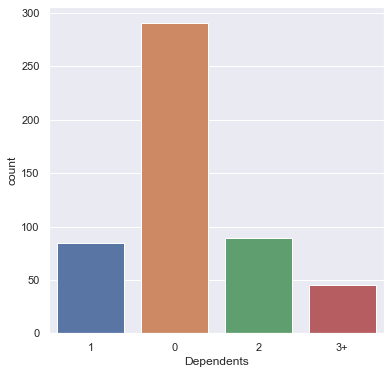

In [41]:

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Dependents', data = loan_train)
plt.show()

In [36]:
#Display the 15 rows having null values in Dependents column
loan_train[loan_train['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,1,1,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,1,1,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,1,1,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,1,1,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,1,1,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,0,0,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,1,1,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,1,0,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,1,1,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,1,1,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


- Most of them are married. So we can fill the null values on Dependents column based on Married column

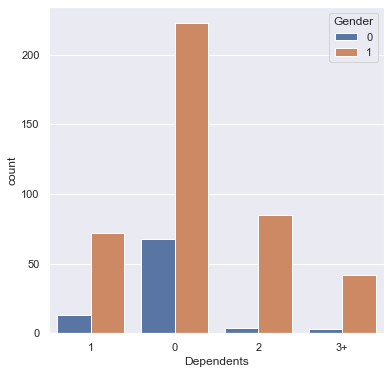

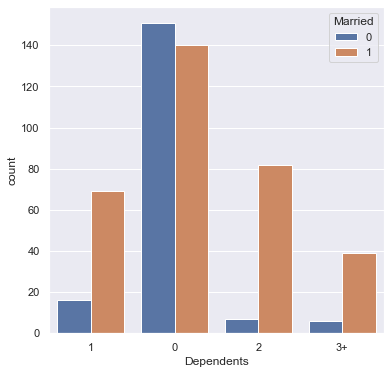

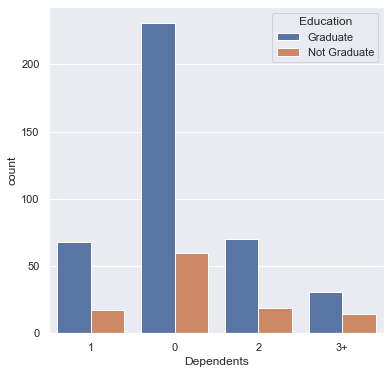

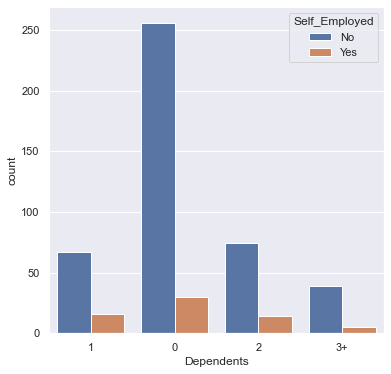

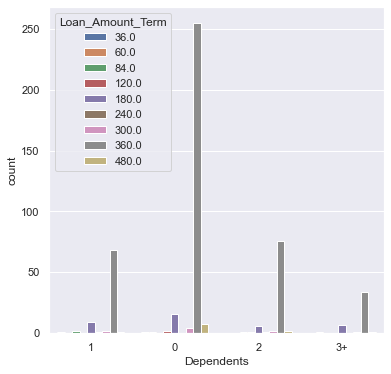

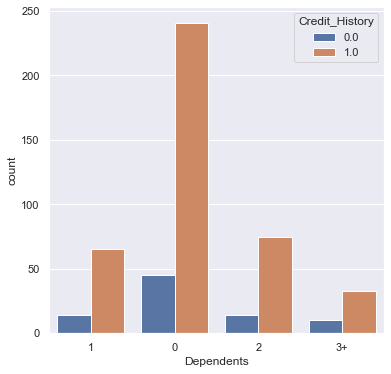

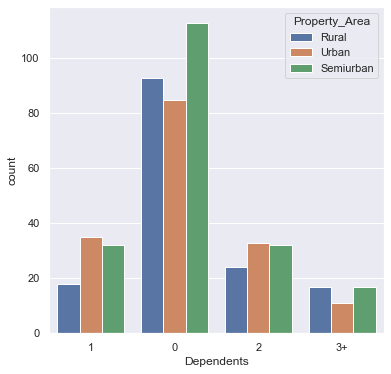

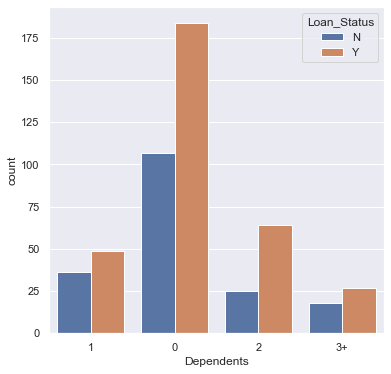

In [44]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Dependents', data = loan_train, hue = 'Gender')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Dependents', data = loan_train, hue = 'Married')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Dependents', data = loan_train, hue = 'Education')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Dependents', data = loan_train, hue = 'Self_Employed')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Dependents', data = loan_train, hue = 'Loan_Amount_Term')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Dependents', data = loan_train, hue = 'Credit_History')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Dependents', data = loan_train, hue = 'Property_Area')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Dependents', data = loan_train, hue = 'Loan_Status')
plt.show()

#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [45]:
samples_index_to_be_dropped = loan_train[loan_train['Dependents'].isnull()]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
loan_train.reset_index(drop = True, inplace = True)

In [46]:
#Function for filling null values on dependents columns
def dependents_null_value_filler(df):
    for row in range(df.shape[0]):
        if df.loc[row, 'Dependents'] is np.nan:
            df.loc[row, 'Dependents'] = str(df.loc[row, 'Married'])
    return df

In [47]:
#Fill null values on Dependents column
loan_train = dependents_null_value_filler(loan_train)

In [48]:
#Encoding Categorical data into NUmerical Data
loan_train['Dependents'] = loan_train['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

<br><br><br>

#### 5. Education

In [49]:
#Descriptive Statistics on EDucation columns
loan_train['Education'].describe()

count          516
unique           2
top       Graduate
freq           403
Name: Education, dtype: object

- Out of 614 applicants, 480 are Graduated.

In [50]:
#Number of nul values on Education column
loan_train['Education'].isnull().sum()

0

- There are no null values in Education column
- There are two unique values in Education column.
- We can encode Graduate as 1 and Not Graduate as 0

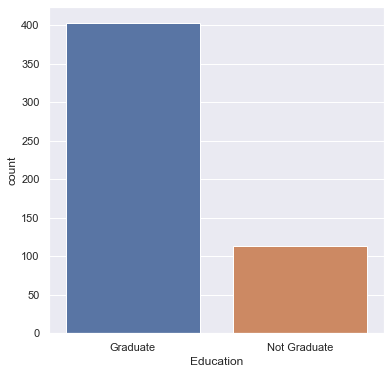

In [51]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Education', data = loan_train)
plt.show()

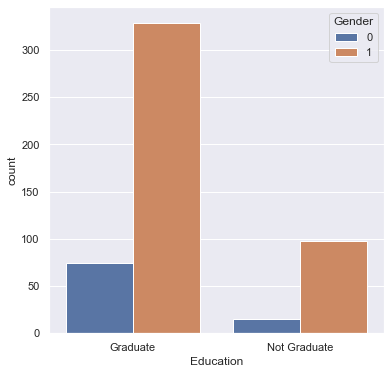

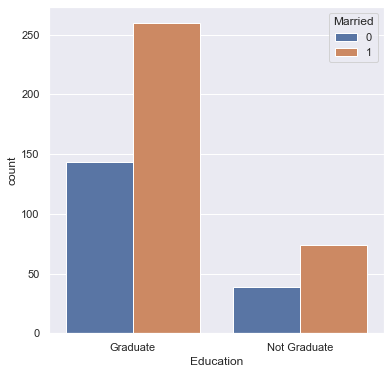

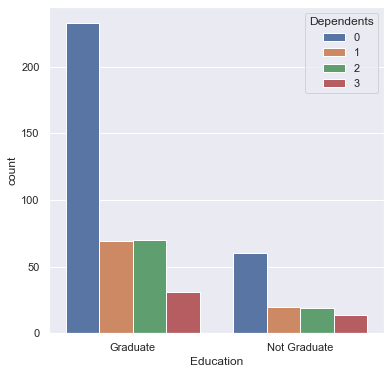

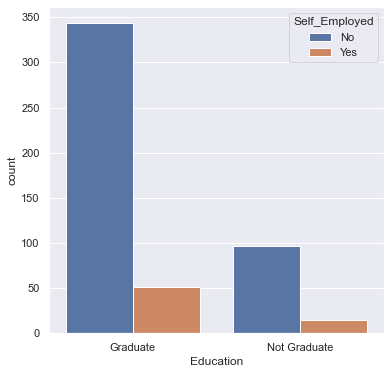

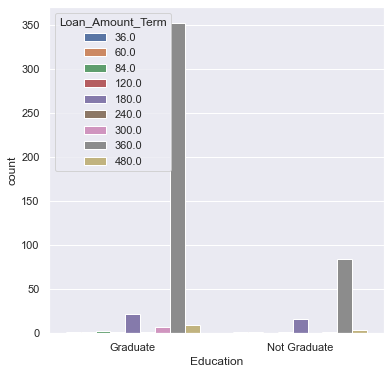

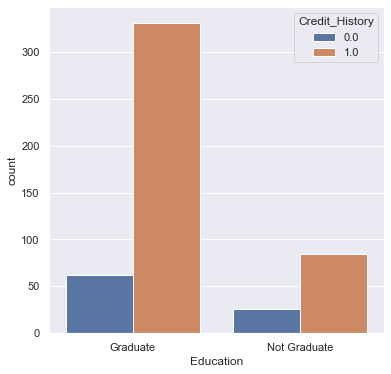

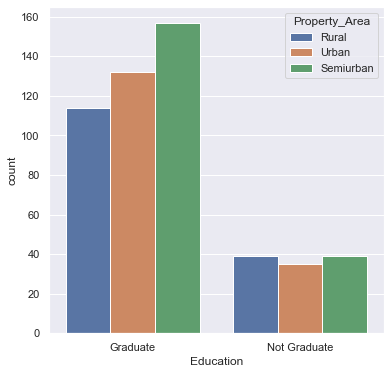

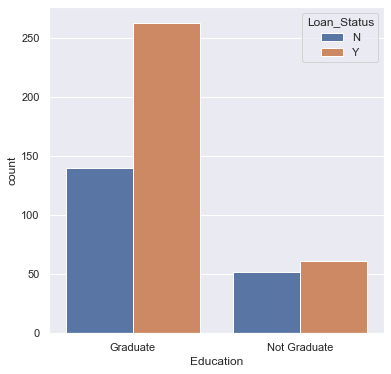

In [52]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Education', data = loan_train, hue = 'Gender')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Education', data = loan_train, hue = 'Married')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Education', data = loan_train, hue = 'Dependents')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Education', data = loan_train, hue = 'Self_Employed')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Education', data = loan_train, hue = 'Loan_Amount_Term')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Education', data = loan_train, hue = 'Credit_History')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Education', data = loan_train, hue = 'Property_Area')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Education', data = loan_train, hue = 'Loan_Status')
plt.show()

In [53]:
#Encoding categorical data into Numerical data
loan_train['Education'] = loan_train['Education'].apply(lambda x : {'Graduate' : 1, 'Not Graduate' : 0}[x])

<br><br><br>

#### 6. Self_Employed

In [54]:
#Descriptive Statistics on Self_Employed column
loan_train['Self_Employed'].describe()

count     507
unique      2
top        No
freq      441
Name: Self_Employed, dtype: object

In [55]:
#Uniques and Values count on Self_Employed column
print("Number of null values : ", loan_train['Self_Employed'].isnull().sum())
print("Unique values : ", loan_train['Self_Employed'].unique())
print("Value counts : \n", loan_train['Self_Employed'].value_counts())

Number of null values :  9
Unique values :  ['No' 'Yes' nan]
Value counts : 
 No     441
Yes     66
Name: Self_Employed, dtype: int64


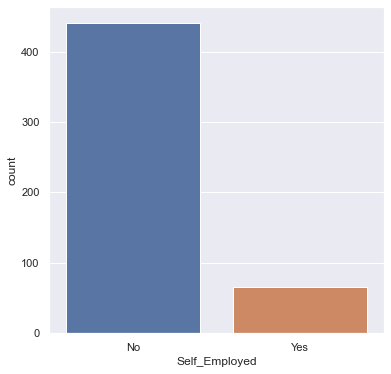

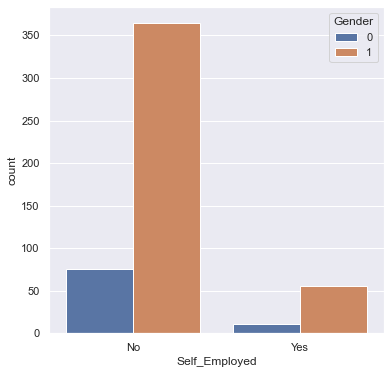

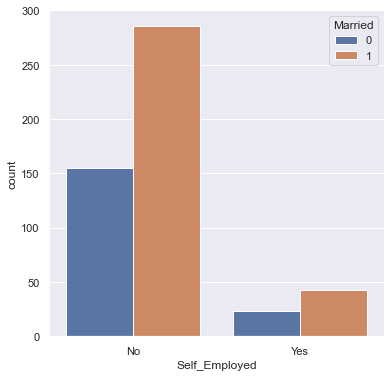

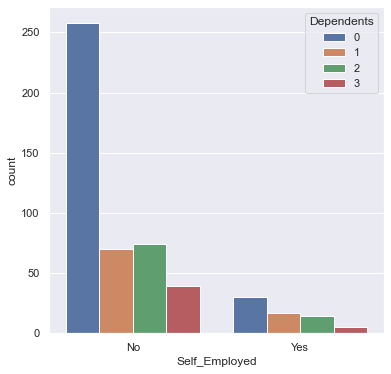

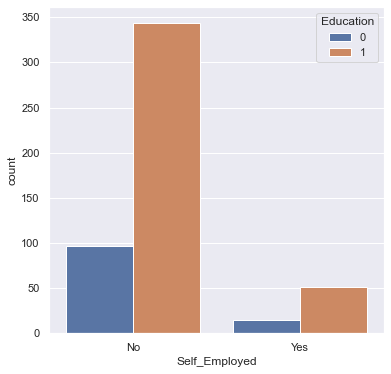

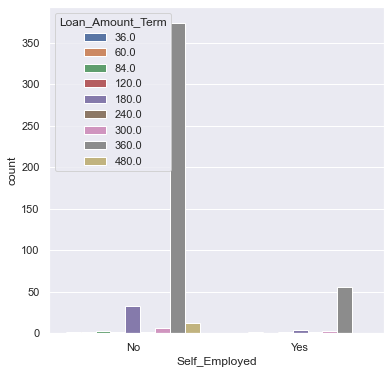

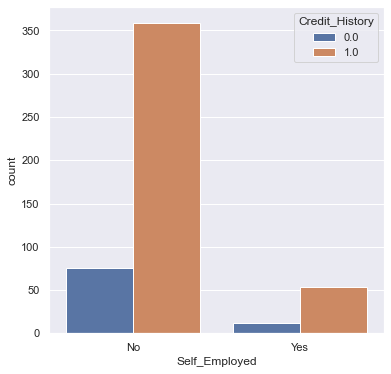

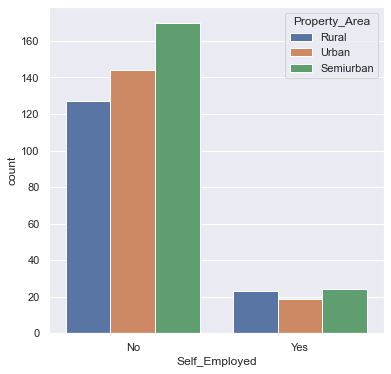

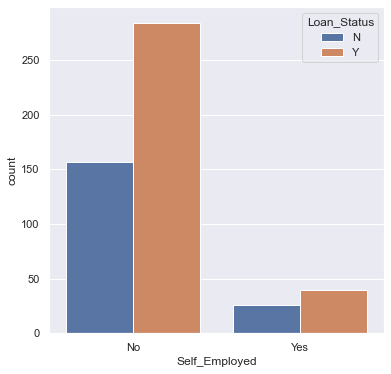

In [56]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Self_Employed', data = loan_train)
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Self_Employed', data = loan_train, hue = 'Gender')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Self_Employed', data = loan_train, hue = 'Married')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Self_Employed', data = loan_train, hue = 'Dependents')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Self_Employed', data = loan_train, hue = 'Education')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Self_Employed', data = loan_train, hue = 'Loan_Amount_Term')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Self_Employed', data = loan_train, hue = 'Credit_History')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Self_Employed', data = loan_train, hue = 'Property_Area')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Self_Employed', data = loan_train, hue = 'Loan_Status')
plt.show()

- Nearly 86% percentage of the applicant are not self employed.
- So we can fill the null values as Not Self employed.

#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [57]:
samples_index_to_be_dropped = loan_train[loan_train['Self_Employed'].isnull()]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
loan_train.reset_index(drop = True, inplace = True)

In [58]:
# Filling Null values with No on Self_Employed column
loan_train['Self_Employed'].fillna(value = 'No', inplace = True)

# Encoding Self_Employed as 1 and Not Self_Employed as 0
loan_train['Self_Employed'] = loan_train['Self_Employed'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

<br><br><br>

#### 7. Applicant Income

In [59]:
# Descriptive Statistics on Applicant Income
loan_train['ApplicantIncome'].describe()

count      516.000000
mean      5036.879845
std       4840.043801
min        150.000000
25%       2893.500000
50%       3839.500000
75%       5731.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [60]:
# Check for null values on ApplicantIncome column
loan_train['ApplicantIncome'].isnull().sum()

0

###### Hence there is no null values

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

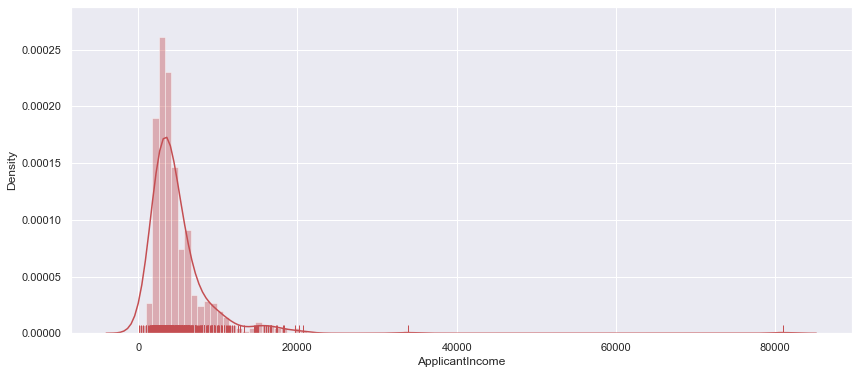

In [64]:
#Distribution of Applicant Income
plt.figure(figsize = (14, 6))
sns.distplot(loan_train['ApplicantIncome'], rug = True, bins = 100, color='r')

- From the above distplot, most of the Applicants income less than Rs.10,000 and some considerable amount of applicants having income between Rs.10,000 and Rs.20,000.

In [65]:
#isplaying the applicants having income more than 20,000
loan_train[loan_train['ApplicantIncome'] > 20000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
153,LP001637,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,Semiurban,N
240,LP001922,1,1,0,1,0,20667,0.0,NaN,360.0,1.0,Rural,N
262,LP001996,1,0,0,1,0,20233,0.0,480.0,360.0,1.0,Rural,N
341,LP002317,1,1,3,1,0,81000,0.0,360.0,360.0,0.0,Rural,N


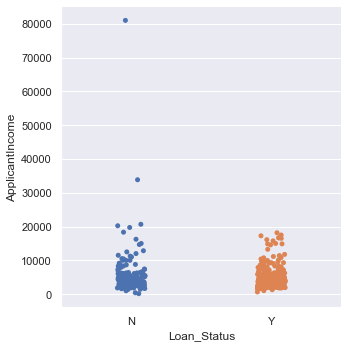

In [66]:
#Let's know the contribution of Applicant Income on determining Loan_Status 
sns.catplot(x = 'Loan_Status', y = 'ApplicantIncome', data = loan_train)

###### From the above categorical plot, Applicant's income failed to differentiate Loan_Status. For more accuracy, we may drop the Applicant Income column.

<br><br><br>

#### 8. Co-applicant Income

In [67]:
#Descriptive Statistics on Co-applicant's Income
loan_train['CoapplicantIncome'].describe()

count      516.000000
mean      1599.092868
std       2988.146992
min          0.000000
25%          0.000000
50%       1146.500000
75%       2250.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [68]:
#  Check for null values on co-applicant income column
loan_train['CoapplicantIncome'].isnull().sum()

0

###### Hence there is no null values on Coapplicant Income column

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

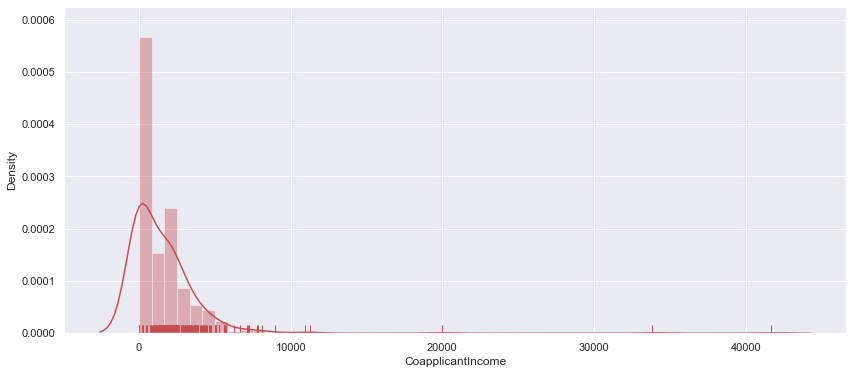

In [69]:
plt.figure(figsize = (14, 6))
sns.distplot(loan_train['CoapplicantIncome'], rug = True, color = 'r')


###### From the above plot most of the co-applicant income is zero or nearer to zero

In [70]:
#Let's get the different values counts on CoapplicantIncome column
loan_train['CoapplicantIncome'].value_counts()

0.0       232
1666.0      5
2500.0      4
2083.0      3
2250.0      3
         ... 
1250.0      1
3021.0      1
983.0       1
1775.0      1
240.0       1
Name: CoapplicantIncome, Length: 246, dtype: int64

<br><br><br>

#### 9. LoanAmount

In [71]:
#Descriptive Statistics on LoanAmount
loan_train['LoanAmount'].describe()

count    505.000000
mean     140.904950
std       70.198124
min        9.000000
25%      100.000000
50%      128.000000
75%      167.000000
max      570.000000
Name: LoanAmount, dtype: float64

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

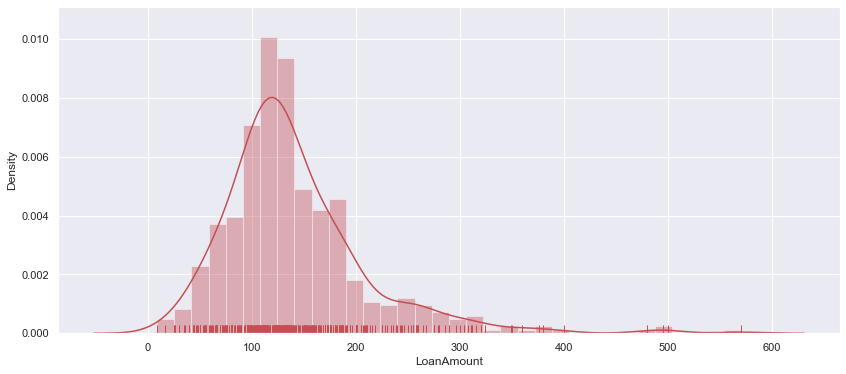

In [72]:
# Distribution of LoanAmount
plt.figure(figsize = (14, 6))
sns.distplot(loan_train['LoanAmount'], rug = True, color = 'r')


In [73]:
#Let's know the different LoanAmount
loan_train['LoanAmount'].value_counts()

110.0    14
100.0    14
120.0    13
187.0    12
128.0    10
         ..
280.0     1
72.0      1
240.0     1
214.0     1
253.0     1
Name: LoanAmount, Length: 190, dtype: int64

In [74]:
#Count of Null values on LoanAmount column
loan_train['LoanAmount'].isnull().sum()

11

##### There are 22 null values on LoanAmount column

In [75]:
#Display the Samples having null values on LoanAmount
loan_train[loan_train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
54,LP001213,1,1,1,1,0,4945,0.0,NaN,360.0,0.0,Rural,N
83,LP001326,1,0,0,1,0,6782,0.0,NaN,360.0,NaN,Urban,N
167,LP001682,1,1,3,0,0,3992,0.0,NaN,180.0,1.0,Urban,N
240,LP001922,1,1,0,1,0,20667,0.0,NaN,360.0,1.0,Rural,N
259,LP001990,1,0,0,0,0,2000,0.0,NaN,360.0,1.0,Urban,N
281,LP002113,0,0,3,0,0,1830,0.0,NaN,360.0,0.0,Urban,N
322,LP002243,1,1,0,0,0,3010,3136.0,NaN,360.0,0.0,Urban,N
399,LP002533,1,1,2,1,0,2947,1603.0,NaN,360.0,1.0,Urban,N
439,LP002697,1,0,0,1,0,4680,2087.0,NaN,360.0,1.0,Semiurban,N
461,LP002778,1,1,2,1,1,6633,0.0,NaN,360.0,0.0,Rural,N


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [76]:
samples_index_to_be_dropped = loan_train[loan_train['LoanAmount'].isnull()]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
loan_train.reset_index(drop = True, inplace = True)

In [77]:
#To know if yes in LoanStatus, then what is the average LoanAmount 
#        and if no in LoanStatus, then what is the average LoanAmount by using GroupBy in LoanStatus

loan_train[~loan_train['LoanAmount'].isnull()].groupby('Loan_Status').describe().T.loc['LoanAmount']

Loan_Status,N,Y
count,181.000000,324.000000
mean,151.220994,135.141975
std,85.862783,59.057129
min,9.000000,17.000000
25%,100.000000,100.000000
50%,129.000000,128.000000
75%,176.000000,160.000000
max,570.000000,400.000000


##### For yes in Loan_Status, average LoanAmount is 151.22 and no in Loan_Status, average LoanAmount is 144.29.

In [78]:
#Filling Above values on LoanAmount column based on LoanStatus.
def LoanAmount_null_values_filler(df):
    for row in range(df.shape[0]):
        if pd.isnull(df.loc[row, 'LoanAmount']):
            if df.loc[row, 'Loan_Status'] == 'Y':
                df.loc[row, 'LoanAmount'] = 151.22
            elif df.loc[row, 'Loan_Status'] == 'N':
                df.loc[row, 'LoanAmount'] = 144.29
            else:
                pass
    return df

In [79]:
# Filling null values on LoanAmount
loan_train = LoanAmount_null_values_filler(loan_train)

<br><br><br>

#### 10. Loan_Amount_Term

In [80]:
#Descriptive Statistics on Loan_Amount_Term
loan_train['Loan_Amount_Term'].describe()

count    510.000000
mean     342.635294
std       64.492856
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [81]:
#Number of null values on Loan_Amount_Term
loan_train['Loan_Amount_Term'].isnull().sum()

6

In [82]:
#Unique Values count in Loan_Amount_Term column
loan_train['Loan_Amount_Term'].value_counts()

360.0    438
180.0     38
480.0     13
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64

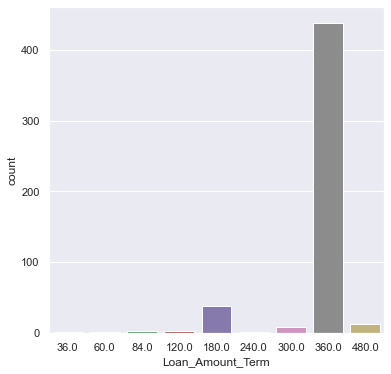

In [83]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Loan_Amount_Term', data = loan_train)
plt.show()

##### Most of the applicants which is nearly 83 % of applicant chosen to Loan_Amount_Term of 360.

In [84]:
#Display the applicant samples aving null values on Loan_Amount_Term
loan_train[pd.isnull(loan_train['Loan_Amount_Term'])]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
30,LP001109,1,1,0,1,0,1828,1330.0,100.0,NaN,0.0,Urban,N
64,LP001250,1,1,3,0,0,4755,0.0,95.0,NaN,0.0,Semiurban,N
96,LP001391,1,1,0,0,0,3572,4114.0,152.0,NaN,0.0,Rural,N
306,LP002188,1,0,0,1,0,5124,0.0,124.0,NaN,0.0,Rural,N
352,LP002357,0,0,0,0,0,2720,0.0,80.0,NaN,0.0,Urban,N
354,LP002362,1,1,1,1,0,7250,1667.0,110.0,NaN,0.0,Urban,N


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [85]:
samples_index_to_be_dropped = loan_train[loan_train['Loan_Amount_Term'].isnull()]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
loan_train.reset_index(drop = True, inplace = True)

In [86]:
#To know if yes in LoanStatus, then what is the average Loan_Amount_Term
#        and if no in LoanStatus, then what is the average Loan_Amount_Term by using GroupBy in LoanStatus

loan_train[~loan_train['Loan_Amount_Term'].isnull()].groupby('Loan_Status').describe().T.loc['Loan_Amount_Term']

Loan_Status,N,Y
count,186.000000,324.000000
mean,344.064516,341.814815
std,69.238921,61.699484
min,36.000000,60.000000
25%,360.000000,360.000000
50%,360.000000,360.000000
75%,360.000000,360.000000
max,480.000000,480.000000


##### For both status of Loan_Status, the average Loan_Amount_Term is approximately. Let's fill them with the value of 360.

In [87]:
#Fill null values on Loan_Amount_Term
loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(value = 360)

<br><br><br>

##### 11. Credit_History

In [88]:
#Descriptive Statistics on Credit_History
loan_train['Credit_History'].describe()

count    503.000000
mean       0.825050
std        0.380303
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [89]:
#Number of null values on Credit_History
loan_train['Credit_History'].isnull().sum()

13

In [90]:
# Unique values count on Credit_History
loan_train['Credit_History'].value_counts()

1.0    415
0.0     88
Name: Credit_History, dtype: int64

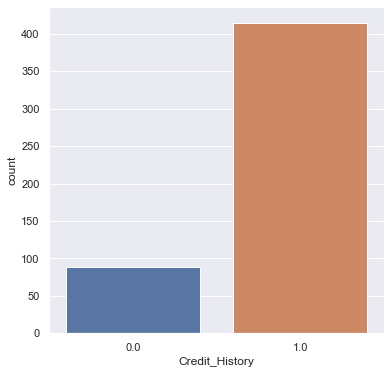

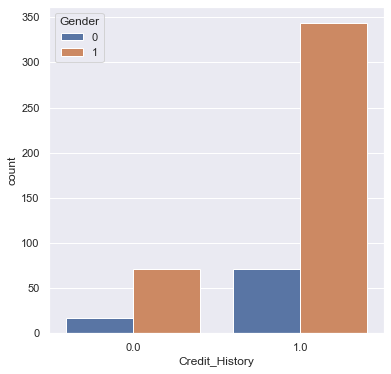

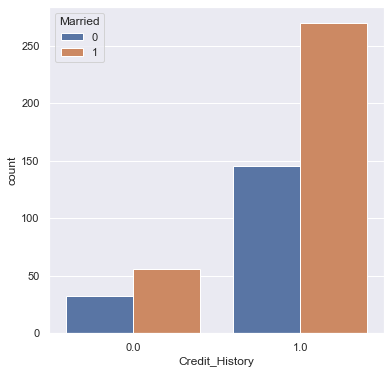

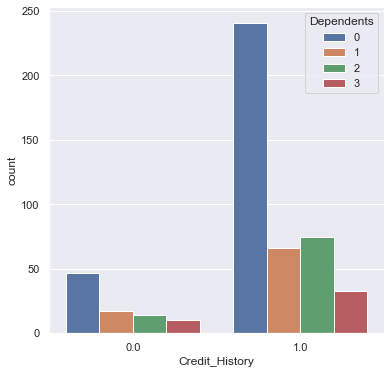

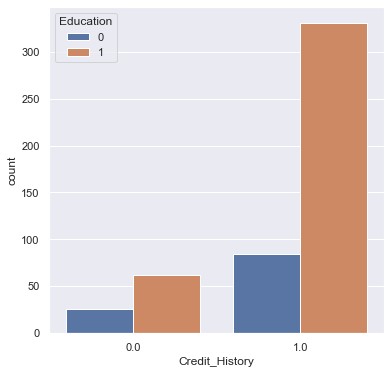

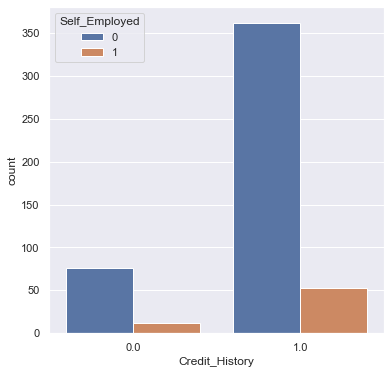

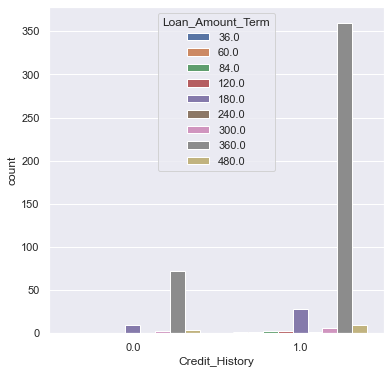

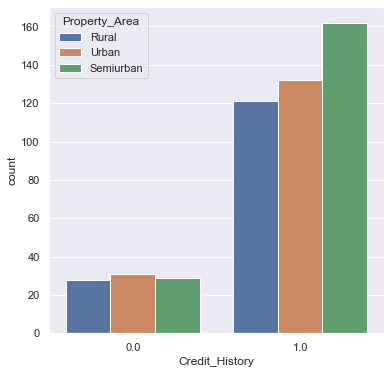

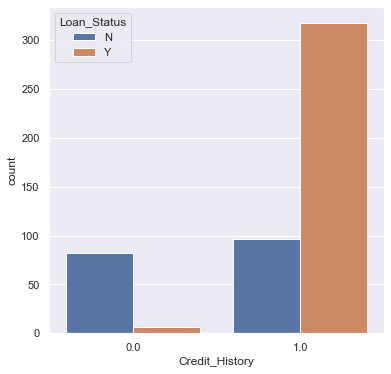

In [91]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Credit_History', data = loan_train)
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Credit_History', data = loan_train, hue = 'Gender')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Credit_History', data = loan_train, hue = 'Married')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Credit_History', data = loan_train, hue = 'Dependents')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Credit_History', data = loan_train, hue = 'Education')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Credit_History', data = loan_train, hue = 'Self_Employed')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Credit_History', data = loan_train, hue = 'Loan_Amount_Term')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Credit_History', data = loan_train, hue = 'Property_Area')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Credit_History', data = loan_train, hue = 'Loan_Status')
plt.show()

In [92]:
# Samples having null values on Credit_History
loan_train[loan_train['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
20,LP001052,1,1,1,1,0,3717,2925.0,151.00,360.0,NaN,Semiurban,N
25,LP001091,1,1,1,1,0,4166,3369.0,201.00,360.0,NaN,Urban,N
72,LP001273,1,1,0,1,0,6000,2250.0,265.00,360.0,NaN,Semiurban,N
83,LP001326,1,0,0,1,0,6782,0.0,144.29,360.0,NaN,Urban,N
106,LP001465,1,1,0,1,0,6080,2569.0,182.00,360.0,NaN,Rural,N
151,LP001634,1,0,0,1,0,1916,5063.0,67.00,360.0,NaN,Rural,N
196,LP001786,1,1,0,1,0,5746,0.0,255.00,360.0,NaN,Urban,N
218,LP001864,1,1,3,0,0,4931,0.0,128.00,360.0,NaN,Semiurban,N
375,LP002444,1,0,1,0,1,2769,1542.0,190.00,360.0,NaN,Semiurban,N
420,LP002618,1,1,1,0,0,4050,5302.0,138.00,360.0,NaN,Rural,N


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [93]:
samples_index_to_be_dropped = loan_train[loan_train['Credit_History'].isnull()]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
loan_train.reset_index(drop = True, inplace = True)

In [94]:
# To know if yes in LoanStatus, then what is the average Credit_History
#        and if no in LoanStatus, then what is the average Credit_History by using GroupBy in LoanStatus

loan_train[~loan_train['Credit_History'].isnull()].groupby('Loan_Status').describe().T.loc['Credit_History']

Loan_Status,N,Y
count,179.000000,324.000000
mean,0.541899,0.981481
std,0.499639,0.135025
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


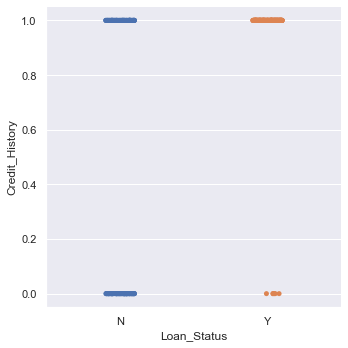

In [95]:
# To know the contribution of Credit_History on Loan_Status
sns.catplot(x = 'Loan_Status', y = 'Credit_History', data = loan_train)

From the above plot, the point we got is
- If the applicant is having Credit_History, then there is a difficulty on classifying.
- But if the applicant is not having Credit_History, then there is a high probability chance of rejection.

##### Since 78 % applicants having the Credit_History, we can fill the null values with 1.0

In [96]:
#Filling null values on Credit_History
loan_train['Credit_History'] = loan_train['Credit_History'].fillna(value = 1.0)

<br><br><br>

#### 12. Property_Area

In [97]:
#Descriptive Statistics on Property_Area
loan_train['Property_Area'].describe()

count           516
unique            3
top       Semiurban
freq            196
Name: Property_Area, dtype: object

In [98]:
#Number of null values on Property_Area
loan_train['Property_Area'].isnull().sum()

0

In [99]:
# Unique values count in Property_Area column
loan_train['Property_Area'].value_counts()

Semiurban    196
Urban        167
Rural        153
Name: Property_Area, dtype: int64

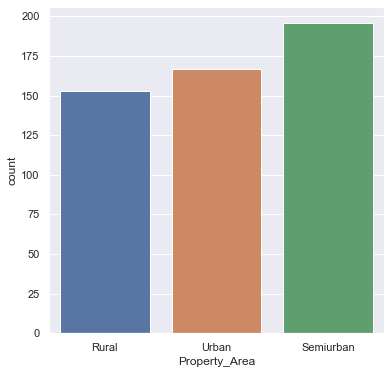

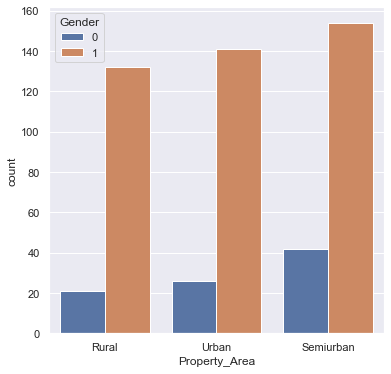

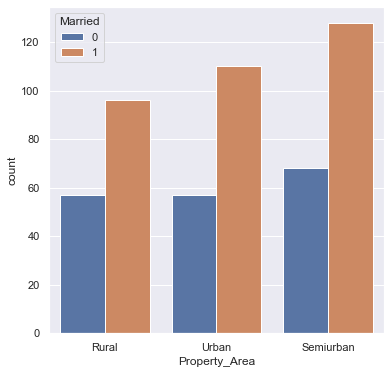

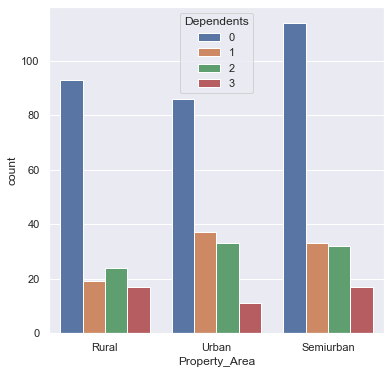

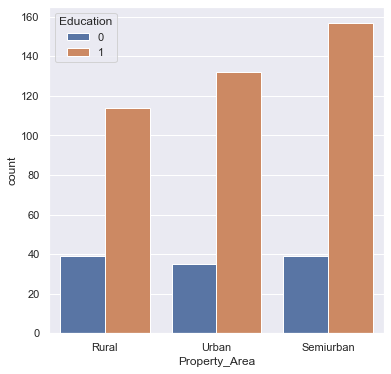

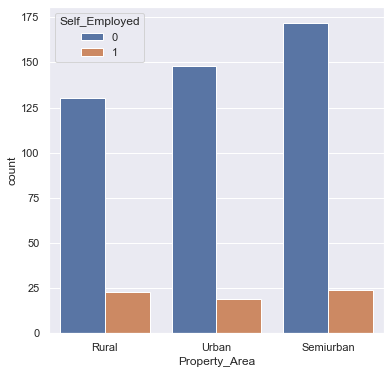

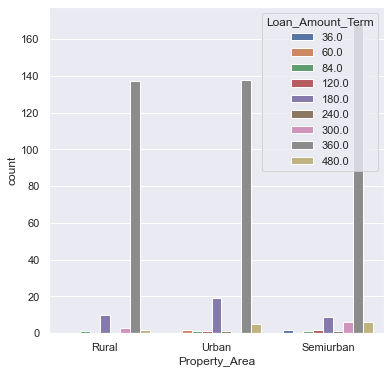

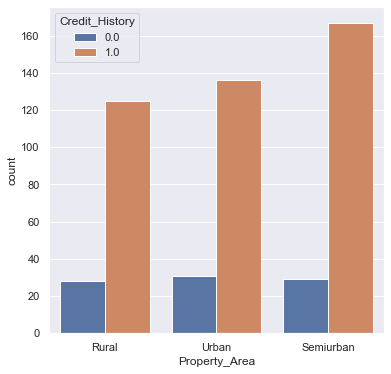

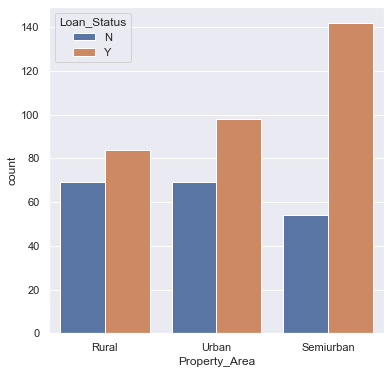

In [100]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Property_Area', data = loan_train)
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Property_Area', data = loan_train, hue = 'Gender')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Property_Area', data = loan_train, hue = 'Married')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Property_Area', data = loan_train, hue = 'Dependents')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Property_Area', data = loan_train, hue = 'Education')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Property_Area', data = loan_train, hue = 'Self_Employed')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Property_Area', data = loan_train, hue = 'Loan_Amount_Term')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Property_Area', data = loan_train, hue = 'Credit_History')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x = 'Property_Area', data = loan_train, hue = 'Loan_Status')
plt.show()

##### Since the Property_Area column having approximately same repetitions on Property_Area columns. we can go with pandas get_dummies for creating separate column for each property area

In [101]:
#To get Property_Area Dummies
Property_Area_Dummies = pd.get_dummies(loan_train['Property_Area'])
Property_Area_Dummies

,Rural,Semiurban,Urban
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
511,1,0,0
512,1,0,0
513,0,0,1
514,0,0,1


In [102]:
#Create Separate column for Rural and Urban Property_Area
loan_train['Property_Area_Rural'] = Property_Area_Dummies['Rural']
loan_train['Property_Area_Semiurban'] = Property_Area_Dummies['Semiurban']

In [103]:
#Dropping Property_Area column as it is replaced with dummy columns
loan_train.drop('Property_Area', axis = 1, inplace = True)

In [104]:
loan_train.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
dtype: int64

#### Finally we replaced all the null values with suitable values.

In [105]:
loan_train.dtypes

Loan_ID                     object
Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
dtype: object

#### Finally we encoded all the categorical columns as numerical columns optimally except Loan_ID and Loan_Status

<br><br><br><br><br><br>

## Feature Selection

In [106]:
# Display columns in Train Data
print(" Columns in the Train Data : \n", loan_train.columns)

 Columns in the Train Data : 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban'],
      dtype='object')


##### From the above discussion, we can remove some of the columns from the training data.

##### Those columns are Loan_ID

##### Let's drop the unwanted columns from train data

In [107]:
#Dropping Loan_ID column from the Train data
loan_train.drop('Loan_ID', axis = 1, inplace = True)

# Detecting Outliers

In [108]:
loan_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban'],
      dtype='object')

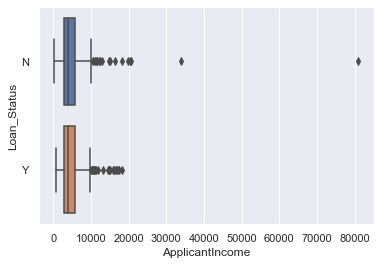

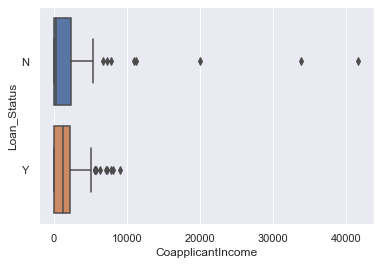

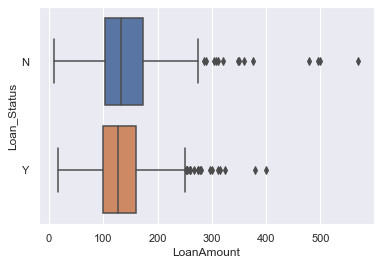

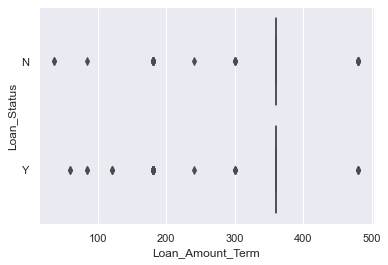

In [109]:
numerical_continuous_data_column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for column in numerical_continuous_data_column:
    sns.boxplot(x = column, y = 'Loan_Status', data = loan_train)
    plt.show()

In [110]:
#Display samples having outliers on ApplicantIncome
loan_train[loan_train['ApplicantIncome'] > 25000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
153,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,N,0,1
341,1,1,3,1,0,81000,0.0,360.0,360.0,0.0,N,1,0


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [111]:
samples_index_to_be_dropped = loan_train[loan_train['ApplicantIncome'] > 25000]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
loan_train.reset_index(drop = True, inplace = True)

In [112]:
# Display samples having outliers on ApplicantIncome
loan_train[loan_train['CoapplicantIncome'] > 15000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
348,1,1,2,1,1,1600,20000.0,239.0,360.0,1.0,N,0,0
487,1,0,0,1,0,1836,33837.0,90.0,360.0,1.0,N,0,0
504,0,0,3,1,0,416,41667.0,350.0,180.0,1.0,N,0,0


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [113]:
samples_index_to_be_dropped = loan_train[loan_train['CoapplicantIncome'] > 25000]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
loan_train.reset_index(drop = True, inplace = True)

In [114]:
#Display Samples having outliers on LoanAmount
loan_train[loan_train['LoanAmount'] > 400]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
147,1,1,3,1,0,5516,11300.0,495.0,360.0,0.0,N,0,1
262,1,0,0,1,0,20233,0.0,480.0,360.0,1.0,N,1,0
308,1,1,0,1,0,19730,5266.0,570.0,360.0,1.0,N,1,0
407,1,1,1,1,0,18333,0.0,500.0,360.0,1.0,N,0,0


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [115]:
samples_index_to_be_dropped = loan_train[loan_train['LoanAmount'] > 400]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
loan_train.reset_index(drop = True, inplace = True)

<br><br><br><br><br><br><br>

# Feature Observation

In [116]:
#Rearranging Train Data columns in order to bring Loan_Status to the last of the DataFrame
loan_train = loan_train.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 10]]

In [117]:
#Let's do the feature correlation
loan_train_corr = loan_train.corr()
loan_train_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban
Gender,1.000000,0.371548,0.197837,-0.055696,0.005894,0.041020,0.068478,0.133729,-0.079049,0.024846,0.060533,-0.086601
Married,0.371548,1.000000,0.372961,-0.008401,0.003389,0.030042,0.074984,0.156013,-0.103525,0.010366,-0.026952,0.009458
Dependents,0.197837,0.372961,1.000000,-0.054972,0.048819,0.110138,0.056802,0.155292,-0.101066,-0.032543,-0.004983,-0.018390
Education,-0.055696,-0.008401,-0.054972,1.000000,-0.007668,0.129803,0.062852,0.163452,0.105640,0.083835,-0.056372,0.037872
Self_Employed,0.005894,0.003389,0.048819,-0.007668,1.000000,0.154822,-0.023741,0.093740,-0.038688,-0.011481,0.043581,-0.012790
ApplicantIncome,0.041020,0.030042,0.110138,0.129803,0.154822,1.000000,-0.128439,0.465776,0.019350,-0.023684,0.088826,-0.059652
CoapplicantIncome,0.068478,0.074984,0.056802,0.062852,-0.023741,-0.128439,1.000000,0.275018,-0.082235,0.005983,-0.010331,-0.035593
LoanAmount,0.133729,0.156013,0.155292,0.163452,0.093740,0.465776,0.275018,1.000000,0.060848,-0.003132,0.090174,-0.029998
Loan_Amount_Term,-0.079049,-0.103525,-0.101066,0.105640,-0.038688,0.019350,-0.082235,0.060848,1.000000,-0.015304,0.040386,0.036135
Credit_History,0.024846,0.010366,-0.032543,0.083835,-0.011481,-0.023684,0.005983,-0.003132,-0.015304,1.000000,-0.021515,0.046993


<AxesSubplot:>

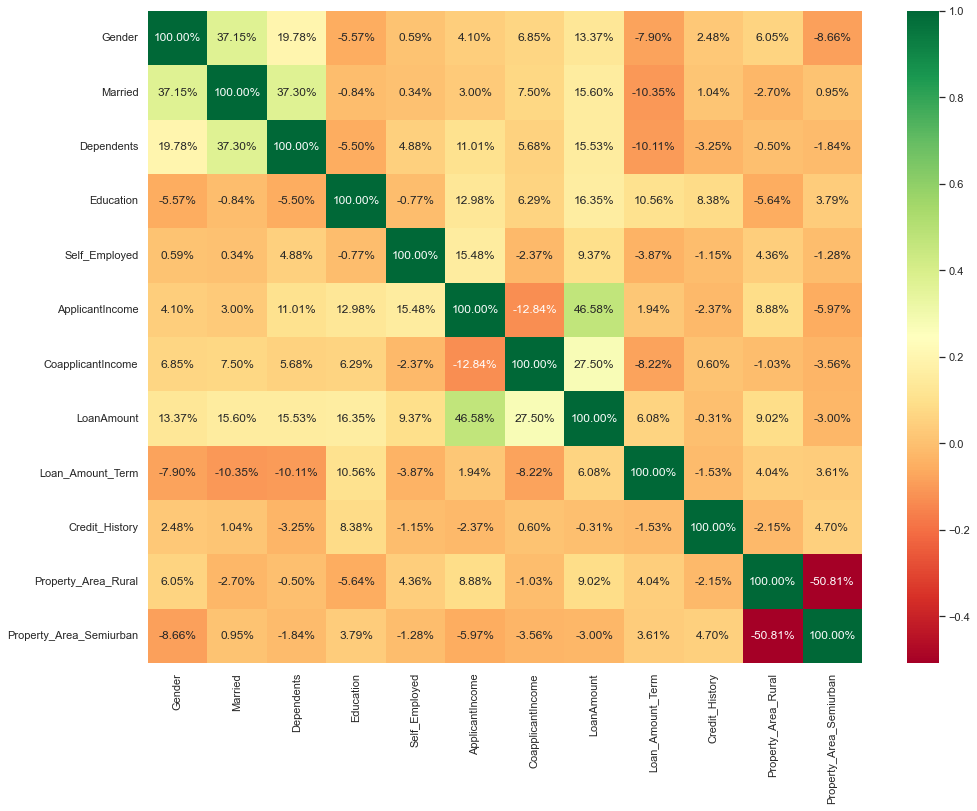

In [119]:
#Visualizing correlation of features
plt.figure(figsize = (16, 12))
sns.heatmap(loan_train_corr, cmap = 'RdYlGn', annot = True, fmt = '.2%')


In [120]:
#To know whether the dataset is Balanced or Imbalanced
loan_train['Loan_Status'].value_counts()

Y    324
N    192
Name: Loan_Status, dtype: int64

#### We have to make the Training Data some more balanced

#### To make the data to be balanced, we are going to duplicate the samples having Loan_Status as NO

In [121]:
#Correlation of Features
corr_with_loan_status = loan_train.corrwith(loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]))
corr_with_loan_status

Gender                     0.041216
Married                    0.094644
Dependents                 0.021940
Education                  0.096496
Self_Employed             -0.017309
ApplicantIncome           -0.065145
CoapplicantIncome         -0.071872
LoanAmount                -0.109256
Loan_Amount_Term          -0.020726
Credit_History             0.525074
Property_Area_Rural       -0.105956
Property_Area_Semiurban    0.156379
dtype: float64

<AxesSubplot:>

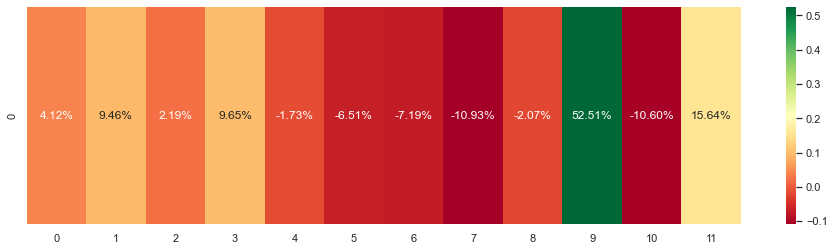

In [123]:
# Feature correlation with loan status
plt.figure(figsize = (16, 4))
sns.heatmap([corr_with_loan_status], cmap = 'RdYlGn', annot = True, fmt = '.2%')


##### Credit_History is having more correlation with Loan_Status

<Figure size 864x432 with 0 Axes>

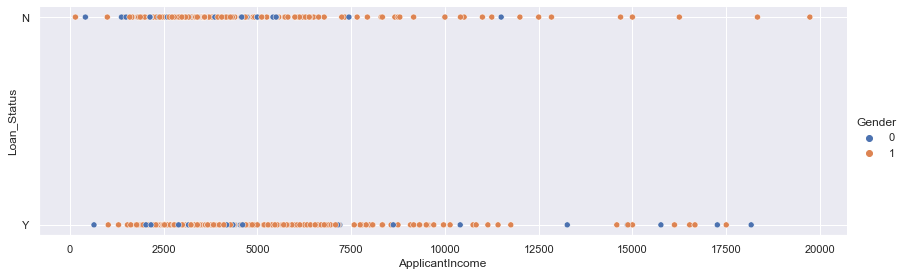

In [124]:
#Relation between Gender, Applicant Income and Loan Status
plt.figure(figsize = (12, 6))
sns.relplot(x = 'ApplicantIncome', y = 'Loan_Status', 
           data = loan_train[loan_train['ApplicantIncome'] <= 20000],
           hue = 'Gender', aspect = 3, height = 4)

##### Looks Same for both the cases

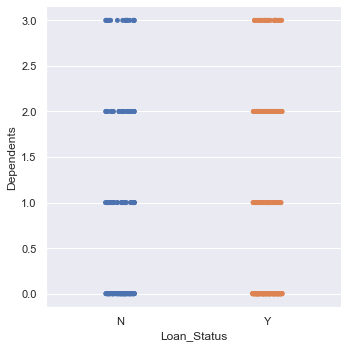

In [125]:
# Relation Between Dependents and Loan Status
sns.catplot(x = 'Loan_Status', y = 'Dependents', data = loan_train)

##### Looks same for both the cases

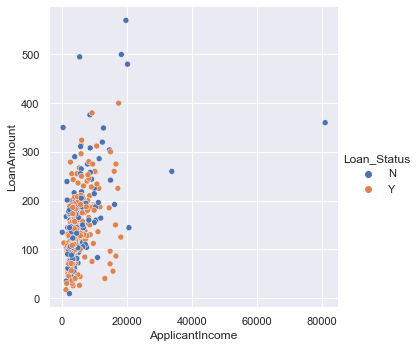

In [126]:
# Relation Between ApplicantIncome and LoanAmount with hue as Loan_Status
sns.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train, hue = 'Loan_Status')

##### There is a relation between LoanAmount and Applicant Income but not classifying Loan_Status

In [127]:
# To know the feature Importances
y = loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]).values
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(loan_train.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to Loan_Status : ")
pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1])

Percentage Importance of each features with respect to Loan_Status : 


Gender                      2.095064
Married                     2.834441
Dependents                  6.233079
Education                   2.405744
Self_Employed               2.310021
ApplicantIncome            18.583242
CoapplicantIncome          11.678040
LoanAmount                 18.685192
Loan_Amount_Term            4.627671
Credit_History             26.098253
Property_Area_Rural         2.014095
Property_Area_Semiurban     2.435158
dtype: float64

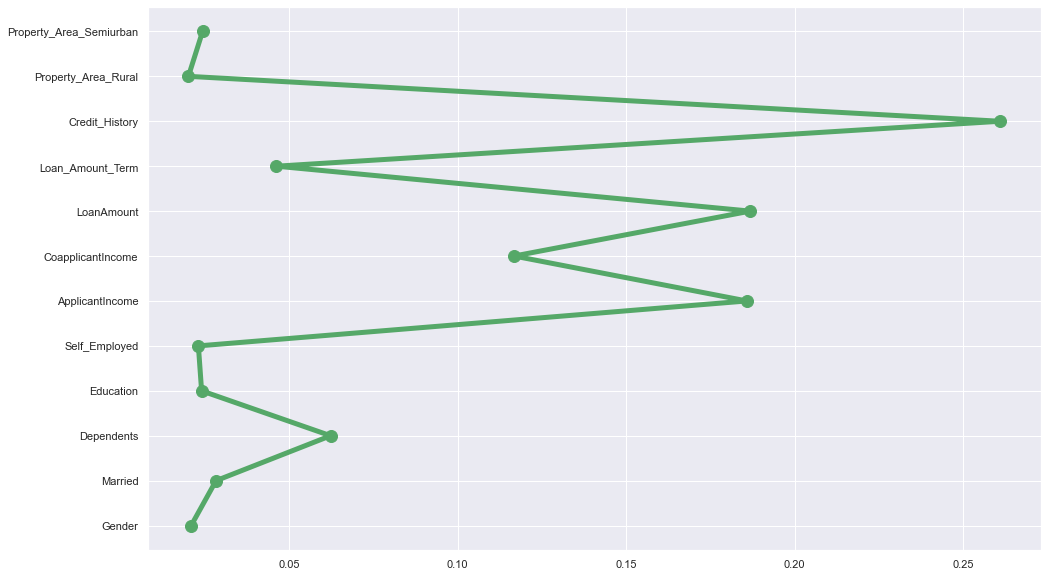

In [128]:
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, loan_train.columns[:-1], 'g-o', linewidth=5, markersize=12)


###### From the above plot, Credit_History (28 %) has the more importance, and then Loan Amount and Applicant Income and then Co-applicant Income

#### Relation Between Credit_History, Loan_Amount and Applicant_Income with Loan_Status

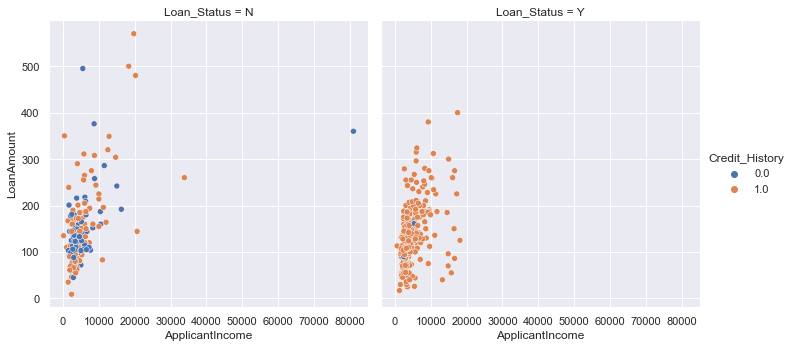

In [129]:
#Relation Between Credit_History, Loan_Amount and Applicant_Income with Loan_Status
sns.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train,
           hue = 'Credit_History', col = 'Loan_Status')

From the above plot,
- The applicants those who are all having the credit history mostly getting te Loan Amount
- From this, Credit_History is the major feature.

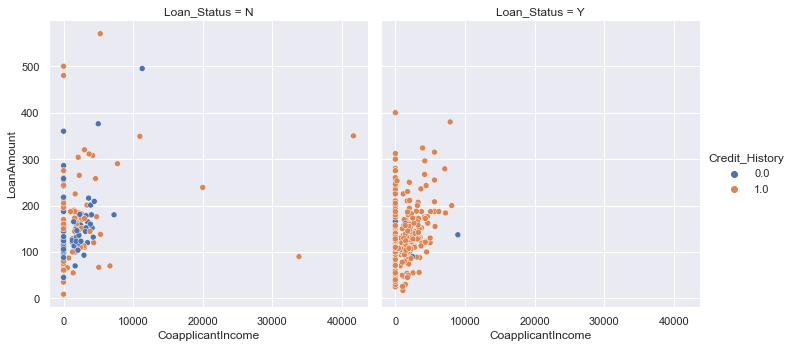

In [130]:
#Relation Between Credit_History, Loan_Amount and Coapplicant_Income with Loan_Status
sns.relplot(x = 'CoapplicantIncome', y = 'LoanAmount', data = loan_train,
           hue = 'Credit_History', col = 'Loan_Status')

#### Most of the Co-applicants are not having income

<br><br><br>

## Feature Selection

In [131]:
#Arranging features based on their importance to the Loan_Status
prediction_features = pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1]).sort_values(ascending = False)

In [132]:
#Extracting Features name
prediction_features = prediction_features.index

In [133]:
prediction_features = prediction_features[:5]
prediction_features

Index(['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome',
       'Dependents'],
      dtype='object')

<br><br><br><br>

# Model Building

In [134]:
feature_columns = loan_train[prediction_features]
prediction_column = loan_train['Loan_Status']

In [135]:
X = feature_columns.values
y = prediction_column.values

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [137]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((412, 5), (104, 5), (412,), (104,))

<br><br><br><br><br><br>

# Logistic Regresion with Model Performance

<br><br>

## Simple Logistic Regression

In [138]:
logictic_model = LogisticRegression(max_iter = 200)
logictic_model.fit(X_train, y_train)

print("Training Accuracy : {}%".format(logictic_model.score(X_train, y_train) * 100))
print("Testing Accuracy  : {}%".format(logictic_model.score(X_test, y_test) * 100))

Training Accuracy : 80.09708737864078%
Testing Accuracy  : 72.11538461538461%


#### Thus our Logistic Regression model is having 80% Training Accuracy and 86% Testing Accuracy

In [139]:
train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(X_train, y_train)
    
    train_score = logictic_model.score(X_train, y_train) * 100
    test_score = logictic_model.score(X_test, y_test) * 100
    
    logistic_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)


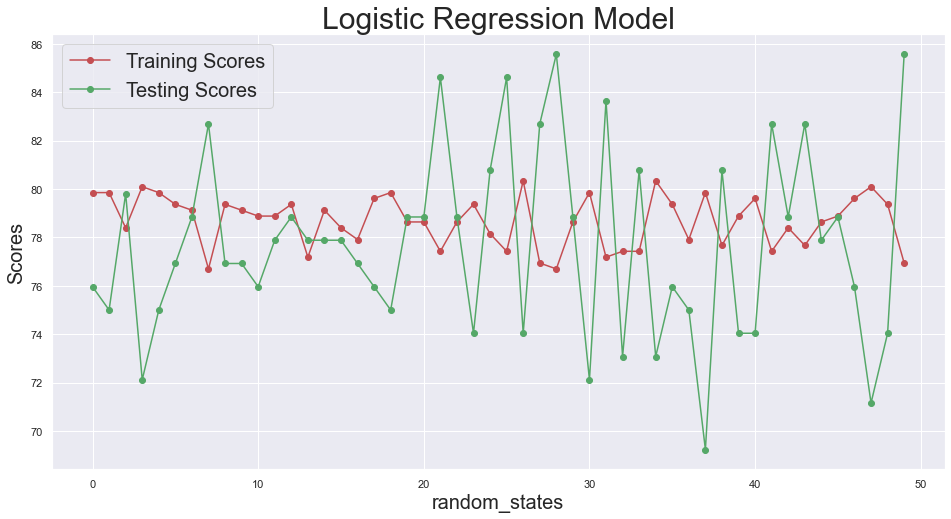

In [141]:
plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model', fontsize = 30)
#plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
plt.show()

In [142]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(train_scores, test_scores, abs(np.array(train_scores) - np.array(test_scores))):
    print(scores)

(79.85436893203884, 75.96153846153845, 3.8928304705003853)
(79.85436893203884, 75.0, 4.854368932038838)
(78.39805825242718, 79.8076923076923, 1.4096340552651299)
(80.09708737864078, 72.11538461538461, 7.981702763256166)
(79.85436893203884, 75.0, 4.854368932038838)
(79.36893203883496, 76.92307692307693, 2.4458551157580217)
(79.12621359223301, 78.84615384615384, 0.28005974607917494)
(76.69902912621359, 82.6923076923077, 5.993278566094105)
(79.36893203883496, 76.92307692307693, 2.4458551157580217)
(79.12621359223301, 76.92307692307693, 2.2031366691560805)
(78.88349514563106, 75.96153846153845, 2.9219566840926063)
(78.88349514563106, 77.88461538461539, 0.9988797610156723)
(79.36893203883496, 78.84615384615384, 0.5227781926811161)
(77.18446601941747, 77.88461538461539, 0.700149365197916)
(79.12621359223301, 77.88461538461539, 1.2415982076176277)
(78.39805825242718, 77.88461538461539, 0.5134428678117899)
(77.9126213592233, 76.92307692307693, 0.9895444361463603)
(79.6116504854369, 75.96153846

#### See how training accuracy and testing accuracy changing for different training Samples

<br><br><br><br>

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

<br><br><br><br>

## Logistic Regression with Standard Scaling and PCA

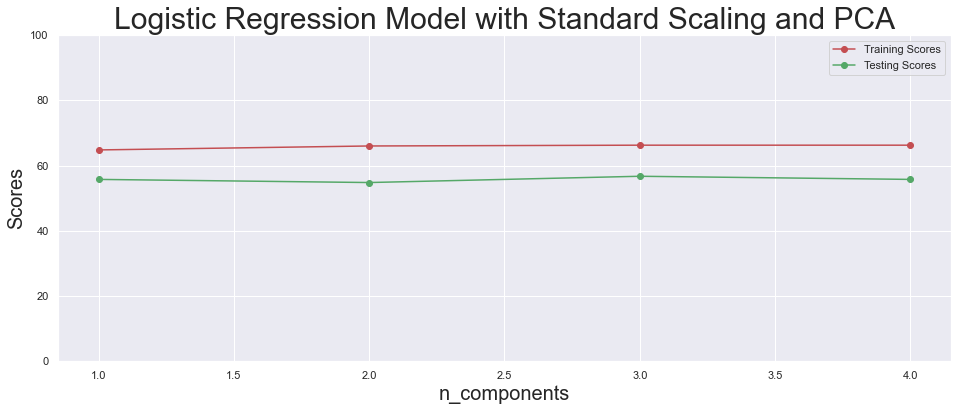

In [144]:
training_scores = []
testing_scores = []
n_components = list(range(1, 5))
for n_component in n_components:
#     # Converting Train Data to Same Scale
    standard_scaler = StandardScaler()
#     # Scaling training samples
    scaled_X_train = standard_scaler.fit_transform(X_train)
#     # Scaling testing samples
    scaled_X_test = standard_scaler.transform(X_test)
    
    # PCA Implementation
    pca = PCA(n_components = n_component)
    pca_X_train = pca.fit_transform(X_train)
    pca_X_test = pca.transform(X_test)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(pca_X_train, y_train)
    training_scores.append(logictic_model.score(pca_X_train, y_train) * 100)
    testing_scores.append(logictic_model.score(pca_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(n_components, training_scores, 'ro-')
plt.plot(n_components, testing_scores, 'go-')
plt.xlabel('n_components', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model with Standard Scaling and PCA', fontsize = 30)
plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

<br><br><br><br><br><br>

# Decision Tree Classifier with Model Performance

<br><br>

## Simple Decision Tree Classifier

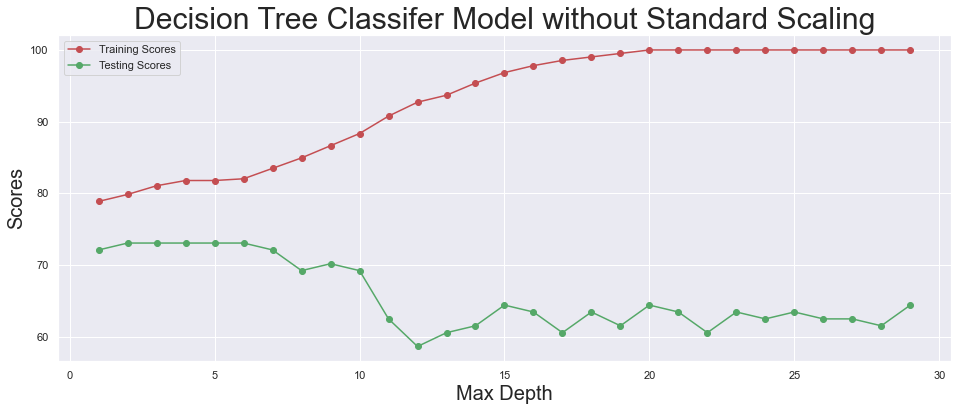

In [147]:
training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    decision_tree_classifier = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree_classifier.fit(X_train, y_train)
    training_scores.append(decision_tree_classifier.score(X_train, y_train) * 100)
    testing_scores.append(decision_tree_classifier.score(X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depth', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifer Model without Standard Scaling', fontsize = 30)
# plt.ylim(50, 105)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

In [148]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(training_scores, testing_scores, abs(np.array(training_scores) - np.array(testing_scores))):
    print(scores)

(78.88349514563106, 72.11538461538461, 6.768110530246446)
(79.85436893203884, 73.07692307692307, 6.777445855115772)
(81.06796116504854, 73.07692307692307, 7.991038088125478)
(81.79611650485437, 73.07692307692307, 8.719193427931302)
(81.79611650485437, 73.07692307692307, 8.719193427931302)
(82.03883495145631, 73.07692307692307, 8.961911874533243)
(83.49514563106796, 72.11538461538461, 11.379761015683343)
(84.9514563106796, 69.23076923076923, 15.720687079910377)
(86.6504854368932, 70.1923076923077, 16.458177744585512)
(88.3495145631068, 69.23076923076923, 19.118745332337568)
(90.77669902912622, 62.5, 28.27669902912622)
(92.71844660194175, 58.65384615384615, 34.0646004480956)
(93.68932038834951, 60.57692307692307, 33.11239731142644)
(95.3883495145631, 61.53846153846154, 33.84988797610156)
(96.84466019417476, 64.42307692307693, 32.42158327109783)
(97.81553398058253, 63.46153846153846, 34.35399551904407)
(98.54368932038835, 60.57692307692307, 37.96676624346528)
(99.02912621359224, 63.461538

#### For Decision Tree Classifier model, we are going to choose max_depth as 8 from the above plot.

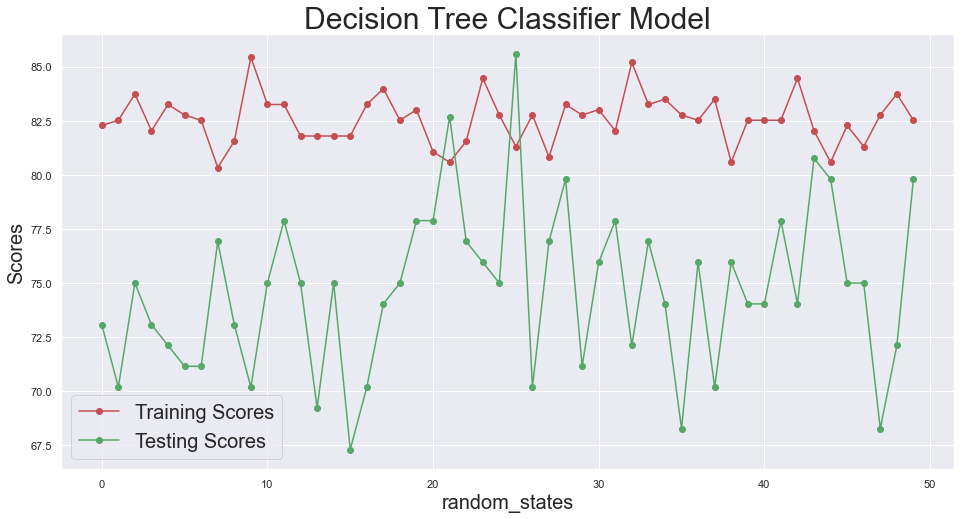

In [149]:
train_scores = []
test_scores = []
decision_tree_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    
    decision_tree_model = DecisionTreeClassifier(max_depth = 6)
    decision_tree_model.fit(X_train, y_train)
    
    train_score = decision_tree_model.score(X_train, y_train) * 100
    test_score = decision_tree_model.score(X_test, y_test) * 100
    
    decision_tree_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifier Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
plt.show()

<br><br><br><br>

## Decision Tree Classifier with Standard Scaling

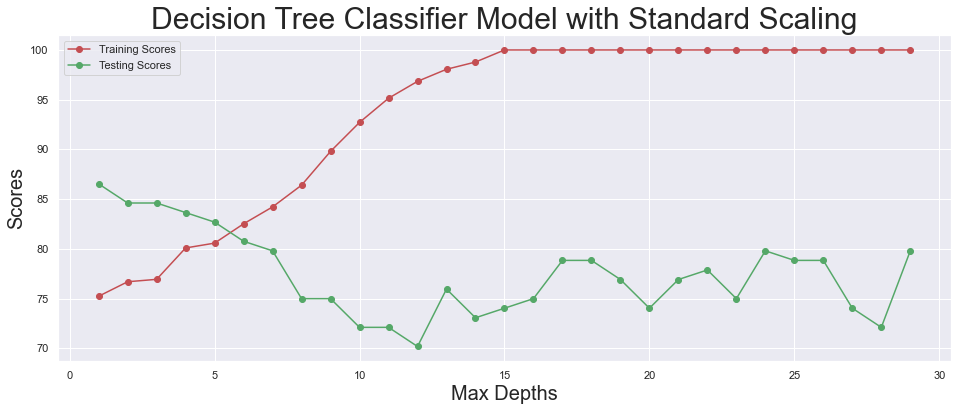

In [150]:
training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    # Converting Train Data to Same Scale
    standard_scaler = StandardScaler()
    
    scaled_X_train = standard_scaler.fit_transform(X_train)
    scaled_X_test = standard_scaler.transform(X_test)
    
    decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree_model.fit(scaled_X_train, y_train)
    training_scores.append(decision_tree_model.score(scaled_X_train, y_train) * 100)
    testing_scores.append(decision_tree_model.score(scaled_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depths', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifier Model with Standard Scaling', fontsize = 30)
# plt.ylim(50, 105)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

#### For Decision Tree Classifier model, we are going to choose max_depth as 8 from the above plot.

In [151]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(training_scores, testing_scores):
    print(scores)

(75.24271844660194, 86.53846153846155)
(76.69902912621359, 84.61538461538461)
(76.94174757281553, 84.61538461538461)
(80.09708737864078, 83.65384615384616)
(80.58252427184466, 82.6923076923077)
(82.52427184466019, 80.76923076923077)
(84.22330097087378, 79.8076923076923)
(86.40776699029125, 75.0)
(89.80582524271846, 75.0)
(92.71844660194175, 72.11538461538461)
(95.14563106796116, 72.11538461538461)
(96.84466019417476, 70.1923076923077)
(98.05825242718447, 75.96153846153845)
(98.7864077669903, 73.07692307692307)
(100.0, 74.03846153846155)
(100.0, 75.0)
(100.0, 78.84615384615384)
(100.0, 78.84615384615384)
(100.0, 76.92307692307693)
(100.0, 74.03846153846155)
(100.0, 76.92307692307693)
(100.0, 77.88461538461539)
(100.0, 75.0)
(100.0, 79.8076923076923)
(100.0, 78.84615384615384)
(100.0, 78.84615384615384)
(100.0, 74.03846153846155)
(100.0, 72.11538461538461)
(100.0, 79.8076923076923)


#### For max_depth = 8, we get a Training Accuracy of 85.74% and a Testing Accuracy of 85.36%

<br><br><br><br>

## Decision Tree Classifier with Standard Scaling and PCA

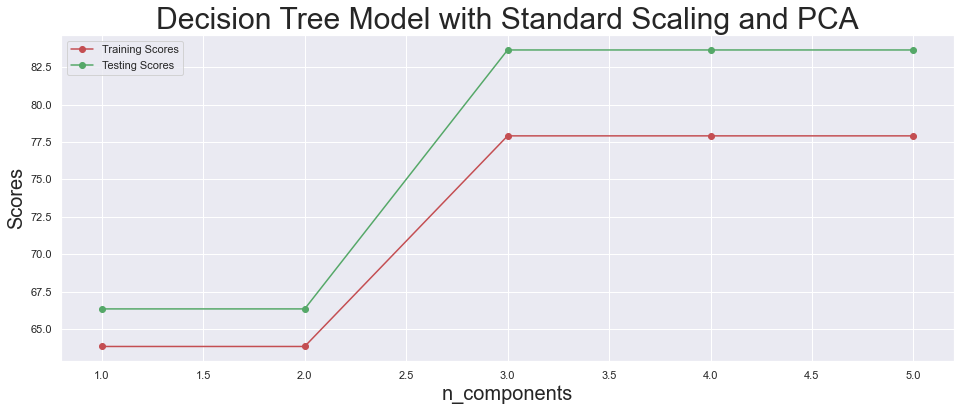

Max_Depth :  3
(63.834951456310684, 66.34615384615384)
(63.834951456310684, 66.34615384615384)
(77.9126213592233, 83.65384615384616)
(77.9126213592233, 83.65384615384616)
(77.9126213592233, 83.65384615384616)


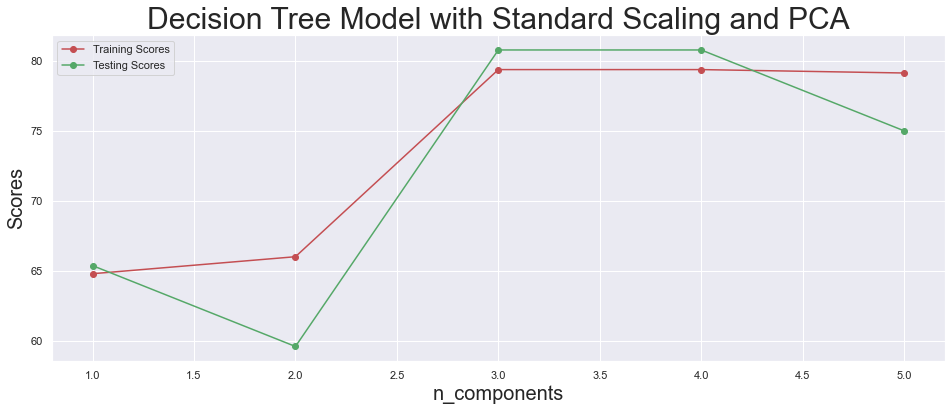

Max_Depth :  4
(64.80582524271846, 65.38461538461539)
(66.01941747572816, 59.61538461538461)
(79.36893203883496, 80.76923076923077)
(79.36893203883496, 80.76923076923077)
(79.12621359223301, 75.0)


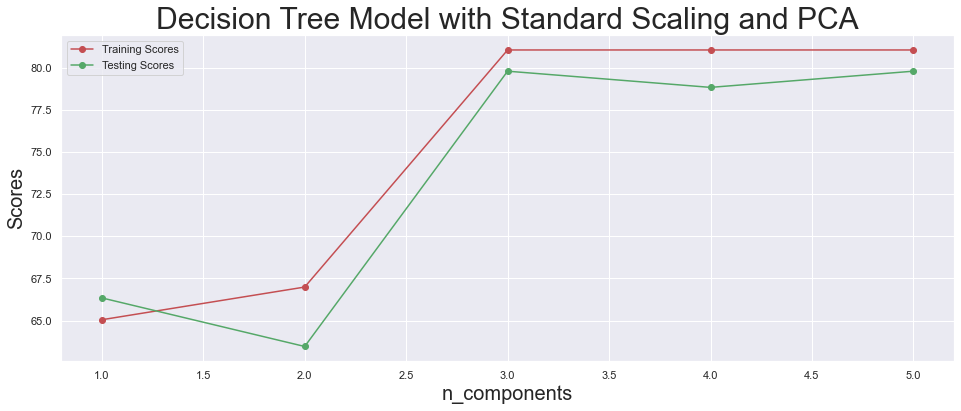

Max_Depth :  5
(65.0485436893204, 66.34615384615384)
(66.99029126213593, 63.46153846153846)
(81.06796116504854, 79.8076923076923)
(81.06796116504854, 78.84615384615384)
(81.06796116504854, 79.8076923076923)


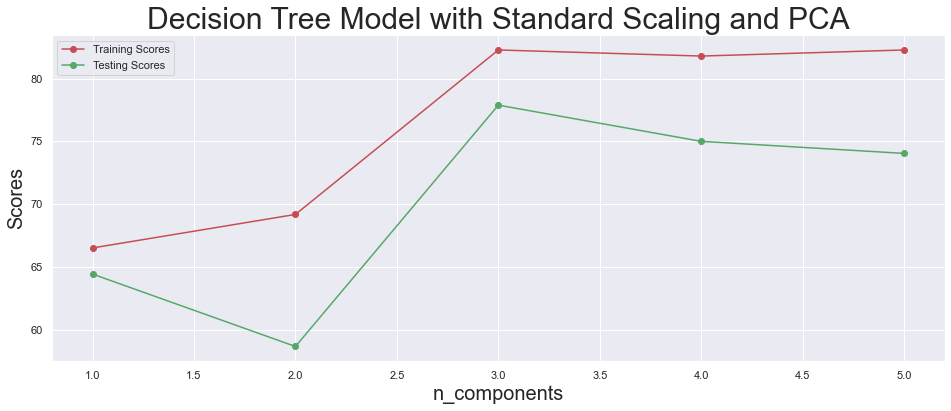

Max_Depth :  6
(66.50485436893204, 64.42307692307693)
(69.1747572815534, 58.65384615384615)
(82.28155339805825, 77.88461538461539)
(81.79611650485437, 75.0)
(82.28155339805825, 74.03846153846155)


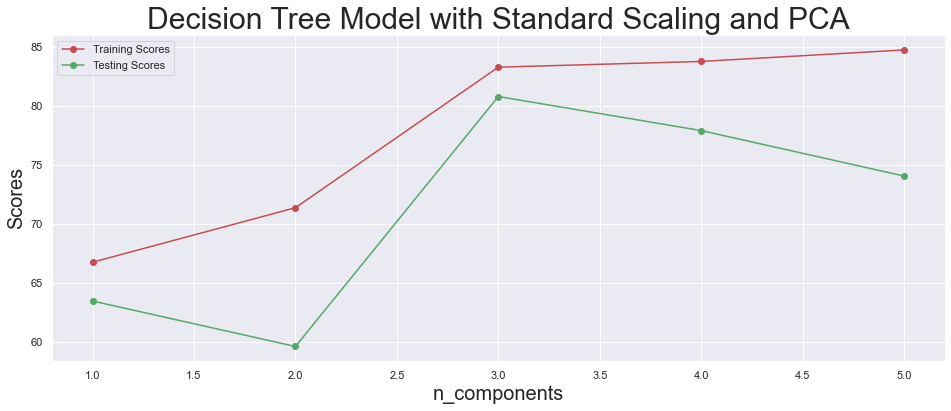

Max_Depth :  7
(66.74757281553399, 63.46153846153846)
(71.35922330097088, 59.61538461538461)
(83.25242718446601, 80.76923076923077)
(83.7378640776699, 77.88461538461539)
(84.70873786407766, 74.03846153846155)


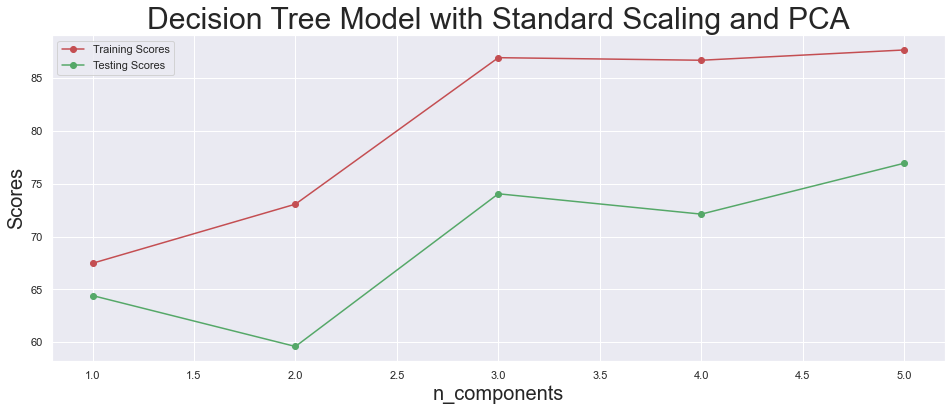

Max_Depth :  8
(67.47572815533981, 64.42307692307693)
(73.05825242718447, 59.61538461538461)
(86.89320388349515, 74.03846153846155)
(86.6504854368932, 72.11538461538461)
(87.62135922330097, 76.92307692307693)


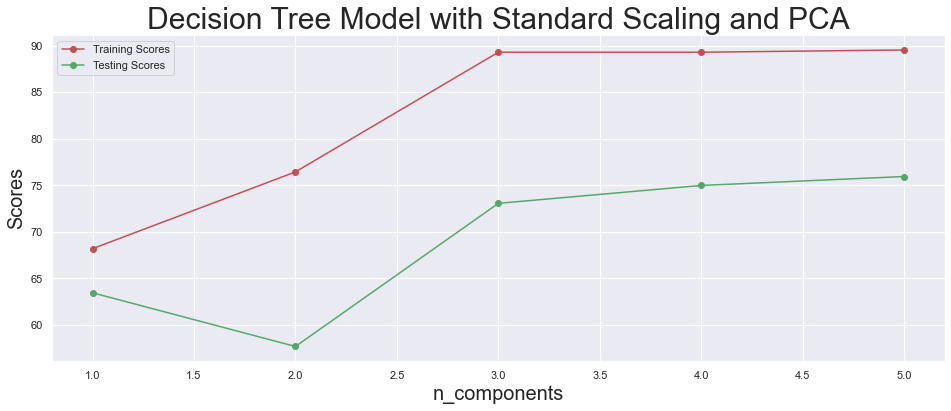

Max_Depth :  9
(68.20388349514563, 63.46153846153846)
(76.45631067961165, 57.692307692307686)
(89.32038834951457, 73.07692307692307)
(89.32038834951457, 75.0)
(89.56310679611651, 75.96153846153845)


In [152]:
for max_depth in range(3, 10):
    training_scores = []
    testing_scores = []
    n_components = list(range(1, 6))
    for n_component in n_components:
        # Converting Train Data to Same Scale
        standard_scaler = StandardScaler()
        # Scaling training samples
        scaled_X_train = standard_scaler.fit_transform(X_train)
        # Scaling testing samples
        scaled_X_test = standard_scaler.transform(X_test)

        # PCA Implementation
        pca = PCA(n_components = n_component)
        pca_X_train = pca.fit_transform(scaled_X_train)
        pca_X_test = pca.transform(scaled_X_test)

        decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
        decision_tree_model.fit(pca_X_train, y_train)
        training_scores.append(decision_tree_model.score(pca_X_train, y_train) * 100)
        testing_scores.append(decision_tree_model.score(pca_X_test, y_test) * 100)

    plt.figure(figsize = (16, 6))
    plt.plot(n_components, training_scores, 'ro-')
    plt.plot(n_components, testing_scores, 'go-')
    plt.xlabel('n_components', fontsize = 20)
    plt.ylabel('Scores', fontsize = 20)
    plt.title('Decision Tree Model with Standard Scaling and PCA', fontsize = 30)
    # plt.ylim(60, 90)
    plt.legend(labels = ['Training Scores', 'Testing Scores'])
    plt.show()
    
    # Let's print the corresponding Training and Testing Scores
    print("Max_Depth : ", max_depth)
    for scores in zip(training_scores, testing_scores):
        print(scores)

#### With PCA, Statndard Scaling and Decision Tree Classifier, we can get a Training accuracy of 89.56% and a Testing accuracy of 75.96%

## Building Optimal Model with Decision Tree without Standard Scaling and without PCA

In [185]:
feature_values = feature_columns.values
prediction_values = loan_train['Loan_Status'].values

In [186]:
decision_tree_model = DecisionTreeClassifier(max_depth = 9)
decision_tree_model.fit(feature_values, prediction_values)

print("Score : ", decision_tree_model.score(feature_values, prediction_values))

Score :  0.8662790697674418


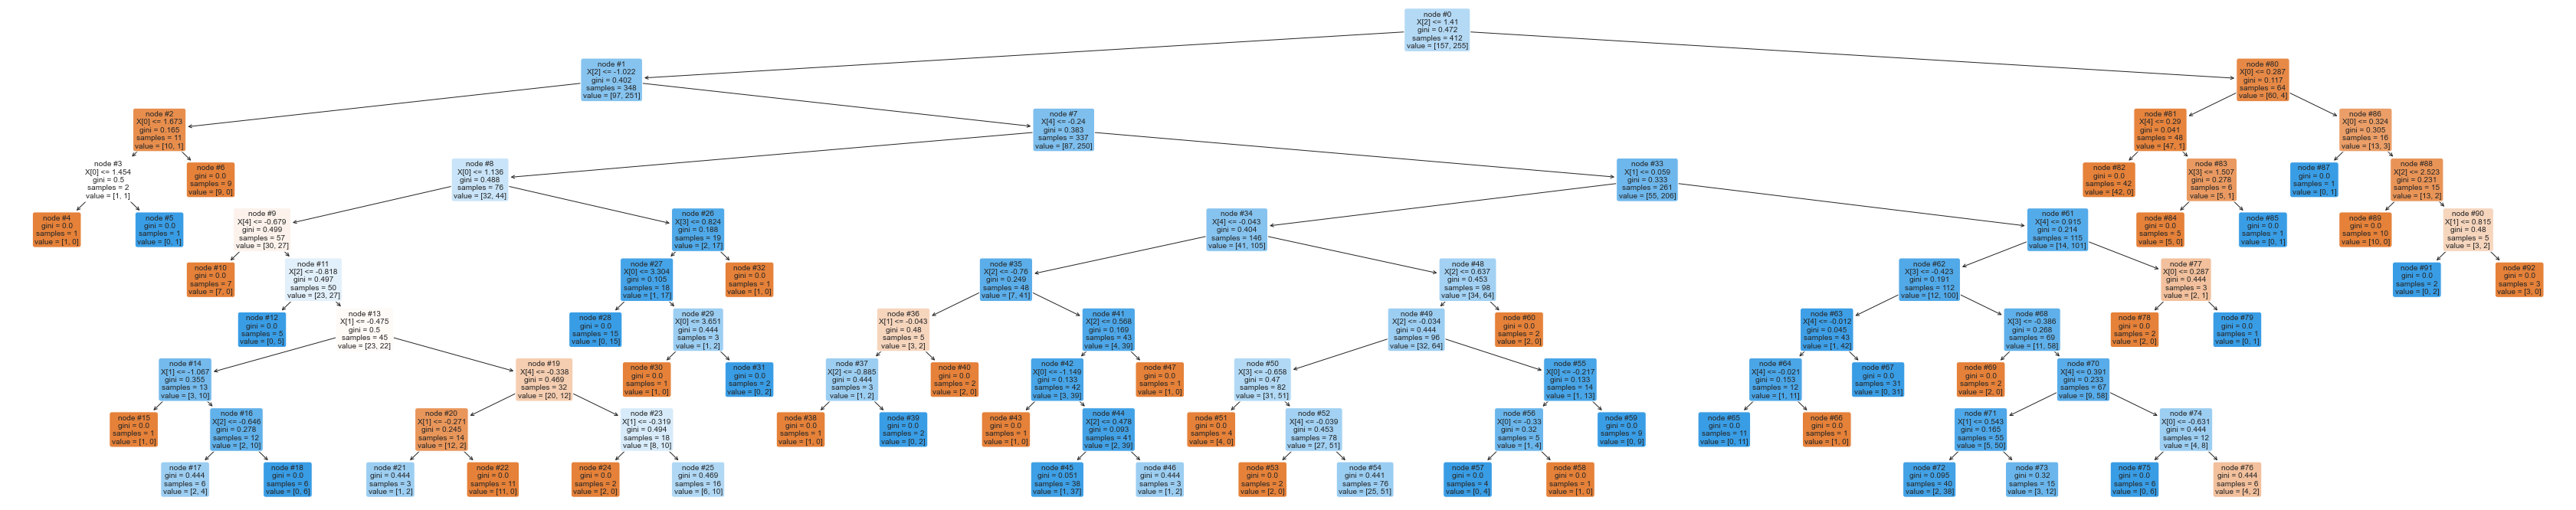

In [236]:
plt.figure(figsize=(60,12))
tree.plot_tree(decision_tree_model,filled=True,node_ids=True,rounded=True,fontsize=10)
plt.savefig('tree_high_dpi_project5', dpi=100)

# Test Data Predictions

In [187]:
loan_test = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv',header=0)
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [188]:
loan_test = loan_test.loc[:, prediction_features]
loan_test.head()

,Credit_History,LoanAmount,ApplicantIncome,CoapplicantIncome,Dependents
0,1.0,NaN,5849,0.0,0
1,1.0,128.0,4583,1508.0,1
2,1.0,66.0,3000,0.0,0
3,1.0,120.0,2583,2358.0,0
4,1.0,141.0,6000,0.0,0


In [189]:
# Preprocessing Test Data

# TODO : Check for null values
loan_test.isnull().sum()

Credit_History       50
LoanAmount           22
ApplicantIncome       0
CoapplicantIncome     0
Dependents           15
dtype: int64

##### The major feature for our model prediction is credit_history
##### so we are going to remove the samples having null values on Credit_History

In [190]:
loan_test = loan_test.dropna(how = 'any')

In [191]:
loan_test.isnull().sum()

Credit_History       0
LoanAmount           0
ApplicantIncome      0
CoapplicantIncome    0
Dependents           0
dtype: int64

In [192]:
#Encoding Categorical data into NUmerical Data
loan_test['Dependents'] = loan_test['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

In [193]:
loan_test['Loan_Status_Predicted'] = decision_tree_model.predict(loan_test.values)

In [194]:
loan_test.Loan_Status_Predicted.value_counts()

Y    399
N    131
Name: Loan_Status_Predicted, dtype: int64

In [202]:
decision_tree_model = DecisionTreeClassifier(max_depth = 9)
decision_tree_model.fit(pca_X_train, y_train)
dtree_predictions =  decision_tree_model.predict(pca_X_test)
check2=pd.DataFrame({'Actual':y_test,'Predicted':dtree_predictions})
check2.head(20)

,Actual,Predicted
0,N,Y
1,N,N
2,Y,Y
3,Y,Y
4,Y,Y
5,Y,Y
6,Y,Y
7,N,N
8,N,Y
9,N,N


In [220]:
pred_probability = pd.DataFrame(p[1] for p in decision_tree_model.predict_proba(pca_X_test))
pred_probability.columns = ["predicted_prob"]
Ytest=pd.DataFrame(y_test)
pred_probability.index = Ytest.index

In [219]:
DTC_test_pred = pd.concat([check2,pred_probability],axis=1)
DTC_test_pred.tail(10)

,Actual,Predicted,predicted_prob
94,N,N,0.000000
95,Y,Y,0.800000
96,Y,Y,0.671053
97,Y,Y,0.671053
98,Y,N,0.000000
99,Y,Y,0.625000
100,Y,Y,0.950000
101,N,Y,0.671053
102,N,N,0.000000
103,Y,Y,1.000000


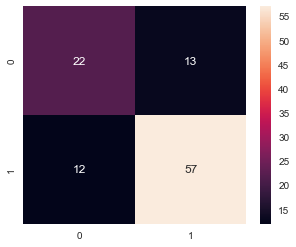

In [226]:
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)


plt.style.use('seaborn')
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [222]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

           N       0.65      0.63      0.64        35
           Y       0.81      0.83      0.82        69

    accuracy                           0.76       104
   macro avg       0.73      0.73      0.73       104
weighted avg       0.76      0.76      0.76       104

